# Data Parsing Class

In [1]:
import pandas as pd
import itertools
import numpy as np
import copy,re
import shap

class dataParsing:
    
    def __init__(self):
        self.X = pd.DataFrame()
        self.Y = pd.DataFrame()
        self.data = pd.DataFrame()
        self.labels = False
        self.targets = ['Unaided_Branding', 'Brand_Cues__Mean','Aided_Branding__Mean',
           'Active_Involvement__Mean','New_Information__Mean', 'Enjoyment__Mean',
           'Brand_Appeal__Mean', 'Understanding__Mean','Relevance_of_Information__Mean',
           'Credibility_of_Information__Mean',
           'Brand_Difference__Mean']
        
    def separate_X_Y(self):
        for tr in self.targets:
            for col in self.data.columns:
                if tr in col:
                    self.Y[tr] = self.data[col]
                else:
                    self.X[col] = self.data[col]

        return self.X,self.Y
            
    
    def load_data(self,path_to_file = None,sheet_name="Data",labels=True):
        
        if path_to_file:
            self.data = pd.read_excel(path_to_file,sheet_name=sheet_name)
            X,Y = self.separate_X_Y()
            return X,Y
        else:
            print("Please provide path to file\n")
            return None
            
    def load_Y(self,path_to_file=None,video_name=False,column_name="Video Name"):
        self.Y = pd.DataFrame()
        if path_to_file:
            Y_data = pd.read_excel(path_to_file,sheet_name=0)
            for tr in self.targets:
                for col in Y_data.columns:
                    if re.sub("[^a-zA-Z]", "",tr) in re.sub("[^a-zA-Z]", "",col):
                        self.Y[tr] = Y_data[col]
            if video_name:
                self.Y["Video_name"] = Y_data[column_name]
        else:
            print("Please provide path to file\n")

        return copy.deepcopy(self.Y)
                        
    def isLabels(self):
        if self.Y.shape[0]!=0 :
            return True
        return False
    

# Feature Engineering Class

In [64]:
class featureEngineering(dataParsing):
    
    def __init__(self,related_brand="microsoft"):
        super().__init__()
        self.feature_columns = ['Video Name', 'Country_AU', 'Country_UK', 'Country_US',
       'length_of_ad_15', 'ad_type_tv', ' Female_frame_count',
       ' Male_frame_count', ' Female_dur', ' Male_dur',
       'Age: 0-15_frame_count', 'Age: 0-5_frame_count',
       'Age: 15-24_frame_count', 'Age: 25-34_frame_count',
       'Age: 35-44_frame_count', 'Age: 45-60_frame_count',
       'Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur',
       'Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count',
       'Sadness_frame_count', 'Surprise_frame_count', 'Angry_dur',
       'Disgust_dur', 'Fear_dur', 'Happiness_dur', 'Neutral_dur',
       'Sadness_dur', 'Surprise_dur', 'African_frame_count',
       'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_dur', 'Caucasian_dur',
       'Eastasian_dur', 'Latino_dur', 'microsoft', 'microsoft_dur',
       'microsoft_first_ocr', 'microsoft_last_ocr', 'microsoft_total_ocr',
       'Intel_dur', 'Intel_first_ocr', 'Intel_last_ocr',
       'Intel_total_ocr', 'ASUS T102', 'Dell PCs', 'Dell XPS',
       'Dell XPS 13', 'HP Spectre x360', 'HP Spectre x360, Windows',
       'Lenovo PCs', 'Lenovo Yoga 720', 'Lenovo Yoga 910', 'MacBook Air',
       'MacBook Pro', 'Macbook Air', 'Microsoft Surface', 'Suface Laptop',
       'Surface Book', 'Surface Go', 'Surface Laptop', 'Surface Pen',
       'Surface Pro', 'Surface Pro 4',
       'Surface Pro 4, Apple_MacBookAir13',
       'Surface Pro 4, HP Spectre x360', 'Surface Pro 4, MacBook Air',
       'Surface Pro 4, MacBook Air13, MacBook Air',
       'Surface Pro 4, Surface Book', 'Surface Pro 4, Windows 10',
       'Surface Pro 6', 'Surface laptop', 'Surface pro 4',
       'The new Surface Pro', 'The surface Laptop', 'Windows',
       'Windows 10', 'Windows 10 PC', 'Windows 10 PCs',
       'Windows 10, HP_Spectre', 'Windows 10, Windows', 'Yoga',
       'ASUS T102_dur', 'Dell PCs_dur', 'Dell XPS_dur', 'Dell XPS 13_dur',
       'HP Spectre x360_dur', 'HP Spectre x360, Windows_dur',
       'Lenovo PCs_dur', 'Lenovo Yoga 720_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Suface Laptop_dur', 'Surface Book_dur',
       'Surface Go_dur', 'Surface Laptop_dur', 'Surface Pen_dur',
       'Surface Pro_dur', 'Surface Pro 4_dur',
       'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface Pro 6_dur', 'Surface laptop_dur', 'Surface pro 4_dur',
       'The new Surface Pro_dur', 'The surface Laptop_dur', 'Windows_dur',
       'Windows 10_dur', 'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Lenovo Yoga 720_first_ocr', 'Lenovo Yoga 720_last_ocr',
       'Lenovo Yoga 720_total_ocr', 'Dell PCs_first_ocr',
       'Dell PCs_last_ocr', 'Dell PCs_total_ocr',
       'Surface Laptop_first_ocr', 'Surface Laptop_last_ocr',
       'Surface Laptop_total_ocr', 'The new Surface Pro_first_ocr',
       'The new Surface Pro_last_ocr', 'The new Surface Pro_total_ocr',
       'Surface Pro_first_ocr', 'Surface Pro_last_ocr',
       'Surface Pro_total_ocr', 'Suface Laptop_first_ocr',
       'Suface Laptop_last_ocr', 'Suface Laptop_total_ocr',
       'Surface laptop_first_ocr', 'Surface laptop_last_ocr',
       'Surface laptop_total_ocr', 'The surface Laptop_first_ocr',
       'The surface Laptop_last_ocr', 'The surface Laptop_total_ocr',
       'Surface Go_first_ocr', 'Surface Go_last_ocr',
       'Surface Go_total_ocr', 'Surface Pro 6_first_ocr',
       'Surface Pro 6_last_ocr', 'Surface Pro 6_total_ocr',
       'Dell XPS_first_ocr', 'Dell XPS_last_ocr', 'Dell XPS_total_ocr',
       'Lenovo PCs_first_ocr', 'Lenovo PCs_last_ocr',
       'Lenovo PCs_total_ocr']
        self.target_columns = self.targets
        
        self.brands_columns=["Intel","Apple","Asus","Hp","Dell"]
        self.related_brand = related_brand
    
        
    def addUnrelatedBrands(self,X,brands_columns=None):
        if isinstance(brands_columns,list) == False:
            brands_columns = self.brands_columns
        for param in ['_dur','_first_ocr','_last_ocr','_total_ocr']:
            unrelated_columns = [col+param for col in brands_columns]
            X['Unrelated'+param] = X[X.loc[:,unrelated_columns].columns].sum(axis=1)
            X = X.drop(unrelated_columns,axis=1)
        
        return X
    
    def nullPer(self,df):
        """Quantifies missing values"""
#         try:        
        return(df.isnull().mean()*100)
#         except:
#             pass
    
    def renameRelatedBrand(self,X,brand_name=None):
        if isinstance(brand_name,str) == False:
            brand_name = self.related_brand
        columns = [brand_name+col for col in ['','_dur','_first_ocr','_last_ocr','_total_ocr']]
        X.rename(columns=dict(zip(columns, ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
            'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)
        return X
    
    def addNewFeature(self,X,columns=None,_type='per',new_column_name=None,):
        if isinstance(columns,list):
            if _type =='sum':
                X[column_name] = X[X.loc[:,_columns].columns].sum(axis=1)
            else:
                for feature in columns:
                    index_1,index_2 = feature[0].rfind("_dur"),feature[1].rfind("_dur")
                    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
                    try:
                        X.insert(len(X.columns)-12,split_1+"_"+split_2+"_dur",X[feature[1]]/X[feature[0]])
                    except:
                        X[split_1+"_"+split_2+"_dur"] = X[feature[1]]/X[feature[0]]
        else:
            print("Please provide columns names and new column name")
        return X
    
    def clean_data(self,X,Y):
        Y =  Y.dropna(how='all') 
        return X.loc[:,self.feature_columns],Y
    
#     def correlation_matrix(self,X):
#         self.utils.plotCorr(X)
        
    def impute_Median_col(self,df, x):
        """Imputes median - treatement for missing values in Pandas series"""
        try:
            df[x].fillna(df[x].median(), inplace = True)
            return df[x]
        except:
            return df[x]
            pass

                  

# Data Preprocessing Class

In [65]:
from imblearn.over_sampling import SMOTE
import numpy as np

class DataPreprocessing(featureEngineering):
    
    def __init__(self):
        super().__init__()
        
    def checkNull(self,df):
        return self.nullPer(df).sort_values(ascending=False)
    
    def removeNULLColumns(self,df,percentage=0.7):
        return df.loc[:, self.nullPer(df)< percentage*100]
    
    def replace(self,df,replace_this,replace_with):
        return df.replace(replace_this,replace_with)
    
    def imputeMedian(self,df,columns=None):
        if isinstance(columns,list)==False:
            columns = ["Related_Brand"+col for col in ['_frame_count','_dur','_first_ocr','_last_ocr','_total_ocr']]
        
        for col in columns:
            df[col] = self.impute_Median_col(df,col)
        return df
    
    def imputeConstant(self,df,columns=None,constant=0):
        if isinstance(columns,list) == False:
            return df.fillna(constant)
        return df[columns].fillna(constant)
    
    def normalize(self,df,axis):
        return normalize(df,axis=1)
    
    def overSampling(self,xDF,yDF,col_as_label = 'length_of_ad_15',each_Col = False,rmCols = ['Video Name','length_of_ad_15'],size=400,random_state=None):
        sm = SMOTE(sampling_strategy = {0:size//2,1:size//2},random_state=random_state)
        labels = xDF.loc[:,col_as_label]
        if each_Col == False:
            temp_inp_df = pd.concat([xDF,yDF],1).drop(rmCols,1)
        else:
            temp_inp_df = pd.concat([xDF,yDF],1)
        X_res, y_res = sm.fit_resample(temp_inp_df,labels)
        
        resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
        resamp_target_df = pd.DataFrame(y_res,columns=['length_of_ad_15'])
        resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
        resamp_data_df['Video Name'] = self.data['Video Name']
        resamp_inputs_df = resamp_data_df[xDF.columns]
        resamp_target_df = resamp_data_df[yDF.columns]
        
        return resamp_inputs_df,resamp_target_df

# Modeling Class

In [66]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
import copy
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV,cross_validate,learning_curve,validation_curve
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Evaluation Class

In [67]:
class Evaluate:
    
    def __init__(self,models,model_type = 'ranf'):
        self.models_eval =[]
        self.model_type = model_type
        
    def evaluate(self,X_test,y_test,metrics='r2_score'):
        
        try:
            X = X_test.drop('Video Name',1)
        except:
            X = X_test
        for i in range(y_test.shape[1]):
            print(y_test.columns[i])
            preds = self.models_eval[i].predict(X)
            if metrics == 'r2_score':
                r2score = r2_score(y_test.iloc[:,i],preds)
                print("R2_SCORE %f" % r2score,"\n")
            elif metrics == 'rmse':
                rmse = math.sqrt(mean_squared_error(preds,y_test.iloc[:,i]))
                print("RMSE %f" % rmse,"\n")
                
    def plot_feature_importance(self,models,figsize,output_columns,feature_columns,savefig=False):
        self.models_eval = models
        try: 
            feature_columns = feature_columns.remove('Video Name')
        except:
            pass
        
        if self.model_type == 'ranf' or self.model_type == 'DT':
            for i in range(len(output_columns)):
                print(output_columns[i])
                importances = self.models_eval[i].feature_importances_
                if self.model_type == 'ranf':
                    std = np.std([tree.feature_importances_ for tree in self.models_eval[i].estimators_],
                                 axis=0)
                indices = np.argsort(importances)[::-1]

                # Print the feature ranking
                print("Feature ranking:")

                for f in range(len(feature_columns)):
                    print("%d. %s (%f)" % (f + 1, feature_columns[indices[f]], importances[indices[f]]))
                    

                # Plot the feature importances of the forest
                
                plt.title(output_columns[i])
                plt.barh(range(len(indices[0:8])), importances[indices[0:8]], color='b', align='center')
                plt.yticks(range(len(indices[0:8])), [feature_columns[i] for i in indices[0:8]])
                plt.xlabel('Relative Importance')
#                 plt.title("Feature importances")
                if savefig:
                    plt.savefig(feature_columns[i]+'_'+ self.model_type+'.png')
                plt.show()
                
        else:
            for i in range(len(output_columns)):
                xgb.plot_importance(self.models_eval[i],max_num_features = 8,xlabel='Gain',title =output_columns[i]+ ' Importance plot')
#             xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Cross Validation R2:' + str(round(np.max(scores),3)) )
            
                plt.rcParams['figure.figsize'] = [30,15]
                plt.rcParams['figure.dpi'] = 100
                matplotlib.rcParams.update({'font.size': 22})
                if savefig:
                    plt.savefig(feature_columns[i]+'_XGB_Plot.png')
                plt.show()
        
        

# Model Class

In [83]:
class Model(Evaluate):
    
    # model={"ranf","xgb","DT"}
    def __init__(self,model='ranf'):
        super().__init__(self,model)
        self.preprocessing = DataPreprocessing()
        self.model_type = model
        self.parameters =[]
        self.all_models=[]
        self.output_length= None
        self.output_columns = None
        
        
        if self.model_type == 'ranf':
            self.model = RandomForestRegressor(warm_start=True,verbose=1,random_state=123)
            Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
            Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
            Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
            New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
            Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
            Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
            Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
            Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
            Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}
        
        elif self.model_type == 'xgb':
            self.model = xgb.XGBRegressor(eta=0.3,save_period=1,random_state=123)
            #### RMSE was decreasing with increaasing n_estimators
            Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 2000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Active_Involvement__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 900,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
            Enjoyment__Mean_params= {'colsample_bytree': 0.8, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Relevance_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Credibility_of_Information__Mean_params = {'colsample_bytree': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
            Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}

        elif self.model_type == 'DT':
            self.model = DecisionTreeRegressor(random_state=123)
            Unaided_Branding_params = {'splitter':'best','max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Brand_mean_cues_params = {'splitter':'best','max_depth':20, 'max_features': 0.6, 'min_samples_leaf': 2,'presort':True}
            Aided_Branding__Mean_params ={'splitter':'best','max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Active_Involvement__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            New_Information__Mean_params = {'max_depth': 20, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Enjoyment__Mean_params= {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Brand_Appeal__Mean_params = {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Understanding__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Relevance_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.3, 'min_samples_leaf': 2,'presort':True}
            Credibility_of_Information__Mean_params = {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            Brand_Difference__Mean_params= {'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 2,'presort':True}
            
            
        self.training_params = [Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,
                        Active_Involvement__Mean_params,New_Information__Mean_params,
                        Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,
                        Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,
                        Brand_Difference__Mean_params]
            
    def gridSearchCV(self,X_df,y_df,parameters,cv,n_jobs=-1):
        try:
            X, y = X_df.drop('Video Name',1),y_df
        except:
            X, y = X_df,y_df
        print("Search starts")
        hyper_tuning = GridSearchCV(self.model,param_grid=parameters,cv=cv,return_train_score=True,verbose=1,n_jobs=n_jobs,scoring='r2')
        hyper_tuning.fit(X,y)
        print("Search End")
        return hyper_tuning,hyper_tuning.best_params_ 
    
    def plot_training_curve(self,estimator,X_train,y_train,X_test,y_test,metric='r2'):
        train_results = estimator.evals_result()
        epochs = len(train_results['validation_0']['rmse'])
        x_axis = range(0, epochs)   
        if metric=='r2':
            TSS_1 = ((y_train-y_train.mean())**2).sum()
            TSS_2 = ((y_test-y_test.mean())**2).sum()

            RSS_1 = (np.array(train_results['validation_0']['rmse'])**2)*X_train.shape[0]
            RSS_2 = (np.array(train_results['validation_1']['rmse'])**2)*X_test.shape[0]
            train_results['validation_0'][metric] = 1- RSS_1/TSS_1
            train_results['validation_1'][metric] = 1- RSS_2/TSS_2
        # plot log loss
        fig, ax = plt.subplots()
        ax.plot(x_axis, train_results['validation_0'][metric], label='Train')
        ax.plot(x_axis, train_results['validation_1'][metric], label='Test')
        prev_score=0
        cnt=0
        for i,score_train in enumerate(train_results['validation_0'][metric]):
            score_test = train_results['validation_1'][metric][i]
            curr_score = abs(score_test-score_train)
            if curr_score >prev_score and curr_score>0.05:
                cnt+=1
            else:
                cnt =0
            if cnt>3:
                epochs= i
                break
            prev_score = curr_score
            
        ax.legend()
        plt.ylim([0,1])
        plt.yticks(np.arange(0, 1, step=0.1))
        plt.ylabel(metric+' Score')
        plt.xlabel('epochs')
        plt.title('XGBoost '+metric+' Score')
        plt.show()
        return epochs
    
    def plot_learning_curve(self,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1,learningCurve=True):
        plt.figure()
        plt.title(title)
#         if ylim is not None:
#             plt.ylim(*ylim)
        plt.ylabel("Score")
        print("Plotting Learning Curve ....\n")
        param_range = np.arange(100,2000,400)
        if learningCurve:
            train_sizes,train_scores, test_scores = learning_curve(estimator, X, y,train_sizes=np.linspace(.1, 1.0, 5),cv=cv, n_jobs=n_jobs)
        else:
            train_scores, test_scores = validation_curve(estimator, X, y, param_name='n_estimators',param_range=param_range,cv=cv, n_jobs=n_jobs,scoring='neg_mean_squared_error')
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        if learningCurve:
            x_var = train_sizes
            label = "Training Sizes"
        else:
            x_var = param_range
            label = "Number of trees"
        plt.grid()
        plt.xlabel(label)
        

        plt.fill_between(x_var, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(x_var, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(x_var, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(x_var, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt
    
#     def adaptive learning(self,)
    def train(self,X_df,Y_df,X_test,Y_test,params={},set_params=False,metrics='r2',plot_error=True,retrain=False):
        self.all_models=[]
        self.output_length = len(Y_df.columns)
        self.output_columns = Y_df.columns
        prev_model =None
        if set_params:
            self.training_params = params
           
        for i in range(self.output_length):
#             if i==10:
                if retrain:
                    temp_model = self.all_models[i]
                    prev_model = temp_model
                else:
                    temp_model = copy.deepcopy(self.model)
                print(Y_df.columns[i])
                try:
                    X, y = X_df.drop('Video Name',1),Y_df[Y_df.columns[i]]
                    test_X, test_y = X_test.drop('Video Name',1),Y_test[Y_test.columns[i]]

                except:
                    X,y = X_df,Y_df[Y_df.columns[i]]   
                    test_X, test_y = X_test,Y_test[Y_test.columns[i]]


                if not retrain:
                    temp_model.set_params(**self.training_params[i])
                results= cross_validate(temp_model,X,y,return_estimator=True,verbose=1,cv=5,n_jobs=-1,scoring=metrics) 
    #             print(results.keys())
#                 predictions = cross_val_predict(temp_model,X,y,cv=5,n_jobs=-1)
                index = np.argmax(results['test_score'])
                if self.model_type== 'ranf' or self.model_type =='DT':
                    temp_model.fit(X,y)
                elif self.model_type== 'xgb':
                    if not (isinstance(prev_model,type(None))):
                        prev_model.save_model('model_')
                        temp_model.load_model('model_')
                        prev_model = 'model_'
                    temp_model.fit(X, y,eval_metric=["rmse"], eval_set=[(X,y),(test_X,test_y)],verbose=False,xgb_model=prev_model)
                if retrain:
                    self.all_models[i] = temp_model
                else:
                    self.all_models.append(temp_model)
                    
#                     for i,row in enumerate(self.all_models[-1].predict(test_X)):
#                         print(row,test_y.iloc[i])
    #                 print(temp_model)
                print("For training set")
                print(metrics+"_score: %f" % (np.mean(results['test_score'])))
#                 print(metrics+"_score: %f" % (r2_score(y,predictions)))
                print("For test set")
                print(metrics+"_score: %f" % (r2_score(test_y,self.all_models[-1].predict(test_X))))
    #             eval_set = [(X, y)]

                if self.model_type =='ranf' and plot_error:
                    plT = self.plot_learning_curve(self.all_models[i],"Training and Testing",X,y,cv=5)
                    plT.show()
                elif self.model_type=='xgb' and plot_error:
                    epochs = self.plot_training_curve(self.all_models[i],X,y,test_X,test_y)

                print("\n")
        return self.all_models
            
    def predict(self,X_test):
        
        if isinstance(self.output_length,int)==False:
            print("Please train your model first\n")
            return
        else:
            try:
                X = X_test.drop('Video Name',1)
            except:
                X = X_test
            preds= pd.DataFrame()
            for i in range(self.output_length):
                preds[self.output_columns[i]] = self.all_models[i].predict(X)
            
            return preds
        
#     def stacking(self,):
        

In [124]:
model = Model('xgb')

In [125]:
X,Y = model.preprocessing.load_data('./MSFT_Agg_Data_30052019_2.xlsx',labels=False,sheet_name=0)
# Y_earlier = preprocessData.load_Y('./Updated_targets_220519.xlsx',column_name="Video_Name",video_name=True)
Y = model.preprocessing.load_Y('./Updated_targets_300519.xlsx',video_name=False)

In [126]:
X =X.drop(60)
X,Y= model.preprocessing.clean_data(X,Y)

In [127]:
new_features =[["Happiness_dur",' Female_dur'],["Surprise_dur"," Male_dur"],["Neutral_dur"," Male_dur"],["Happiness_dur","Age: 0-5_dur"],["Disgust_dur","Age: 45-60_dur"],["Surprise_dur","Age: 0-5_dur"],["Neutral_dur","Age: 25-34_dur"],["Happiness_dur","Eastasian_dur"],["Surprise_dur","Eastasian_dur"]]
age_cols = ['Age: 0-15_dur', 'Age: 0-5_dur', 'Age: 15-24_dur','Age: 25-34_dur', 'Age: 35-44_dur', 'Age: 45-60_dur']
ethinicity_cols = ['African_dur', 'Caucasian_dur', 'Eastasian_dur','Latino_dur']
age_ethinicity_col = list(itertools.product(age_cols,ethinicity_cols))
new_features.extend(age_ethinicity_col)

In [128]:
X = model.preprocessing.addNewFeature(X,new_features,_type='per')

In [129]:
model.preprocessing.checkNull(X).head()
X= model.preprocessing.removeNULLColumns(X,percentage=0.8)
model.preprocessing.checkNull(X).head()

Windows 10_total_ocr     75.968992
Windows 10_last_ocr      75.968992
Windows 10_first_ocr     75.968992
Age: 35-44_Latino_dur    72.093023
Age: 0-15_African_dur    68.217054
dtype: float64

In [130]:
ocr_columns = [col for col in X.columns if "ocr" in col]
frame_count_columns = [col for col in X.columns if "_frame_count" in col]

X[ocr_columns] = model.preprocessing.imputeConstant(X,columns=ocr_columns,constant=-1)
X = model.preprocessing.replace(X,np.inf,np.nan)

In [131]:
columns_removed =[]
for x in X.columns.values:
#     if x+'_dur' in X.columns.values or '_frame_count' in x:
    if '_frame_count' in x:
        columns_removed.append(x)

In [132]:
X = X.drop(columns=columns_removed,axis=1)

In [133]:
# X [frame_count_columns] = model.preprocessing.imputeConstant(X,columns=frame_count_columns,constant=0)
X = model.preprocessing.imputeConstant(X,constant=0)

In [134]:
Y = model.preprocessing.imputeMedian(Y,['Unaided_Branding'])
Y.isna().sum()

Unaided_Branding                    0
Brand_Cues__Mean                    0
Aided_Branding__Mean                0
Active_Involvement__Mean            0
New_Information__Mean               0
Enjoyment__Mean                     0
Brand_Appeal__Mean                  0
Understanding__Mean                 0
Relevance_of_Information__Mean      0
Credibility_of_Information__Mean    0
Brand_Difference__Mean              0
dtype: int64

In [135]:
X['Happiness_length_of_ad_impact'] = X['Happiness_dur'] * (1-X['length_of_ad_15'])

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 123,test_size=0.3)

In [137]:
X_res,Y_res = model.preprocessing.overSampling(X,Y,each_Col=False,size=1000,random_state=12)
X_train,X_test,y_train,y_test = train_test_split(X_res,Y_res,random_state = 123,test_size=0.3)

In [138]:
models = model.train(X_train,y_train,X_test,y_test,metrics='r2',plot_error=False)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


For training set
r2_score: 0.939666
For test set
r2_score: 0.967846


Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


For training set
r2_score: 0.899771
For test set
r2_score: 0.888283


Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


For training set
r2_score: 0.902341
For test set
r2_score: 0.870421


Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


For training set
r2_score: 0.891083
For test set
r2_score: 0.911772


New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


For training set
r2_score: 0.926645
For test set
r2_score: 0.924003


Enjoyment__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


For training set
r2_score: 0.892695
For test set
r2_score: 0.917333


Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


For training set
r2_score: 0.930195
For test set
r2_score: 0.940160


Understanding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished


For training set
r2_score: 0.907995
For test set
r2_score: 0.915503


Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


For training set
r2_score: 0.876485
For test set
r2_score: 0.870387


Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


For training set
r2_score: 0.903823
For test set
r2_score: 0.899301


Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


For training set
r2_score: 0.904262
For test set
r2_score: 0.894728




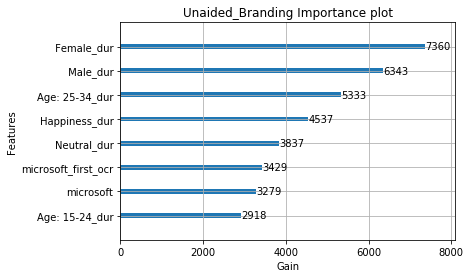

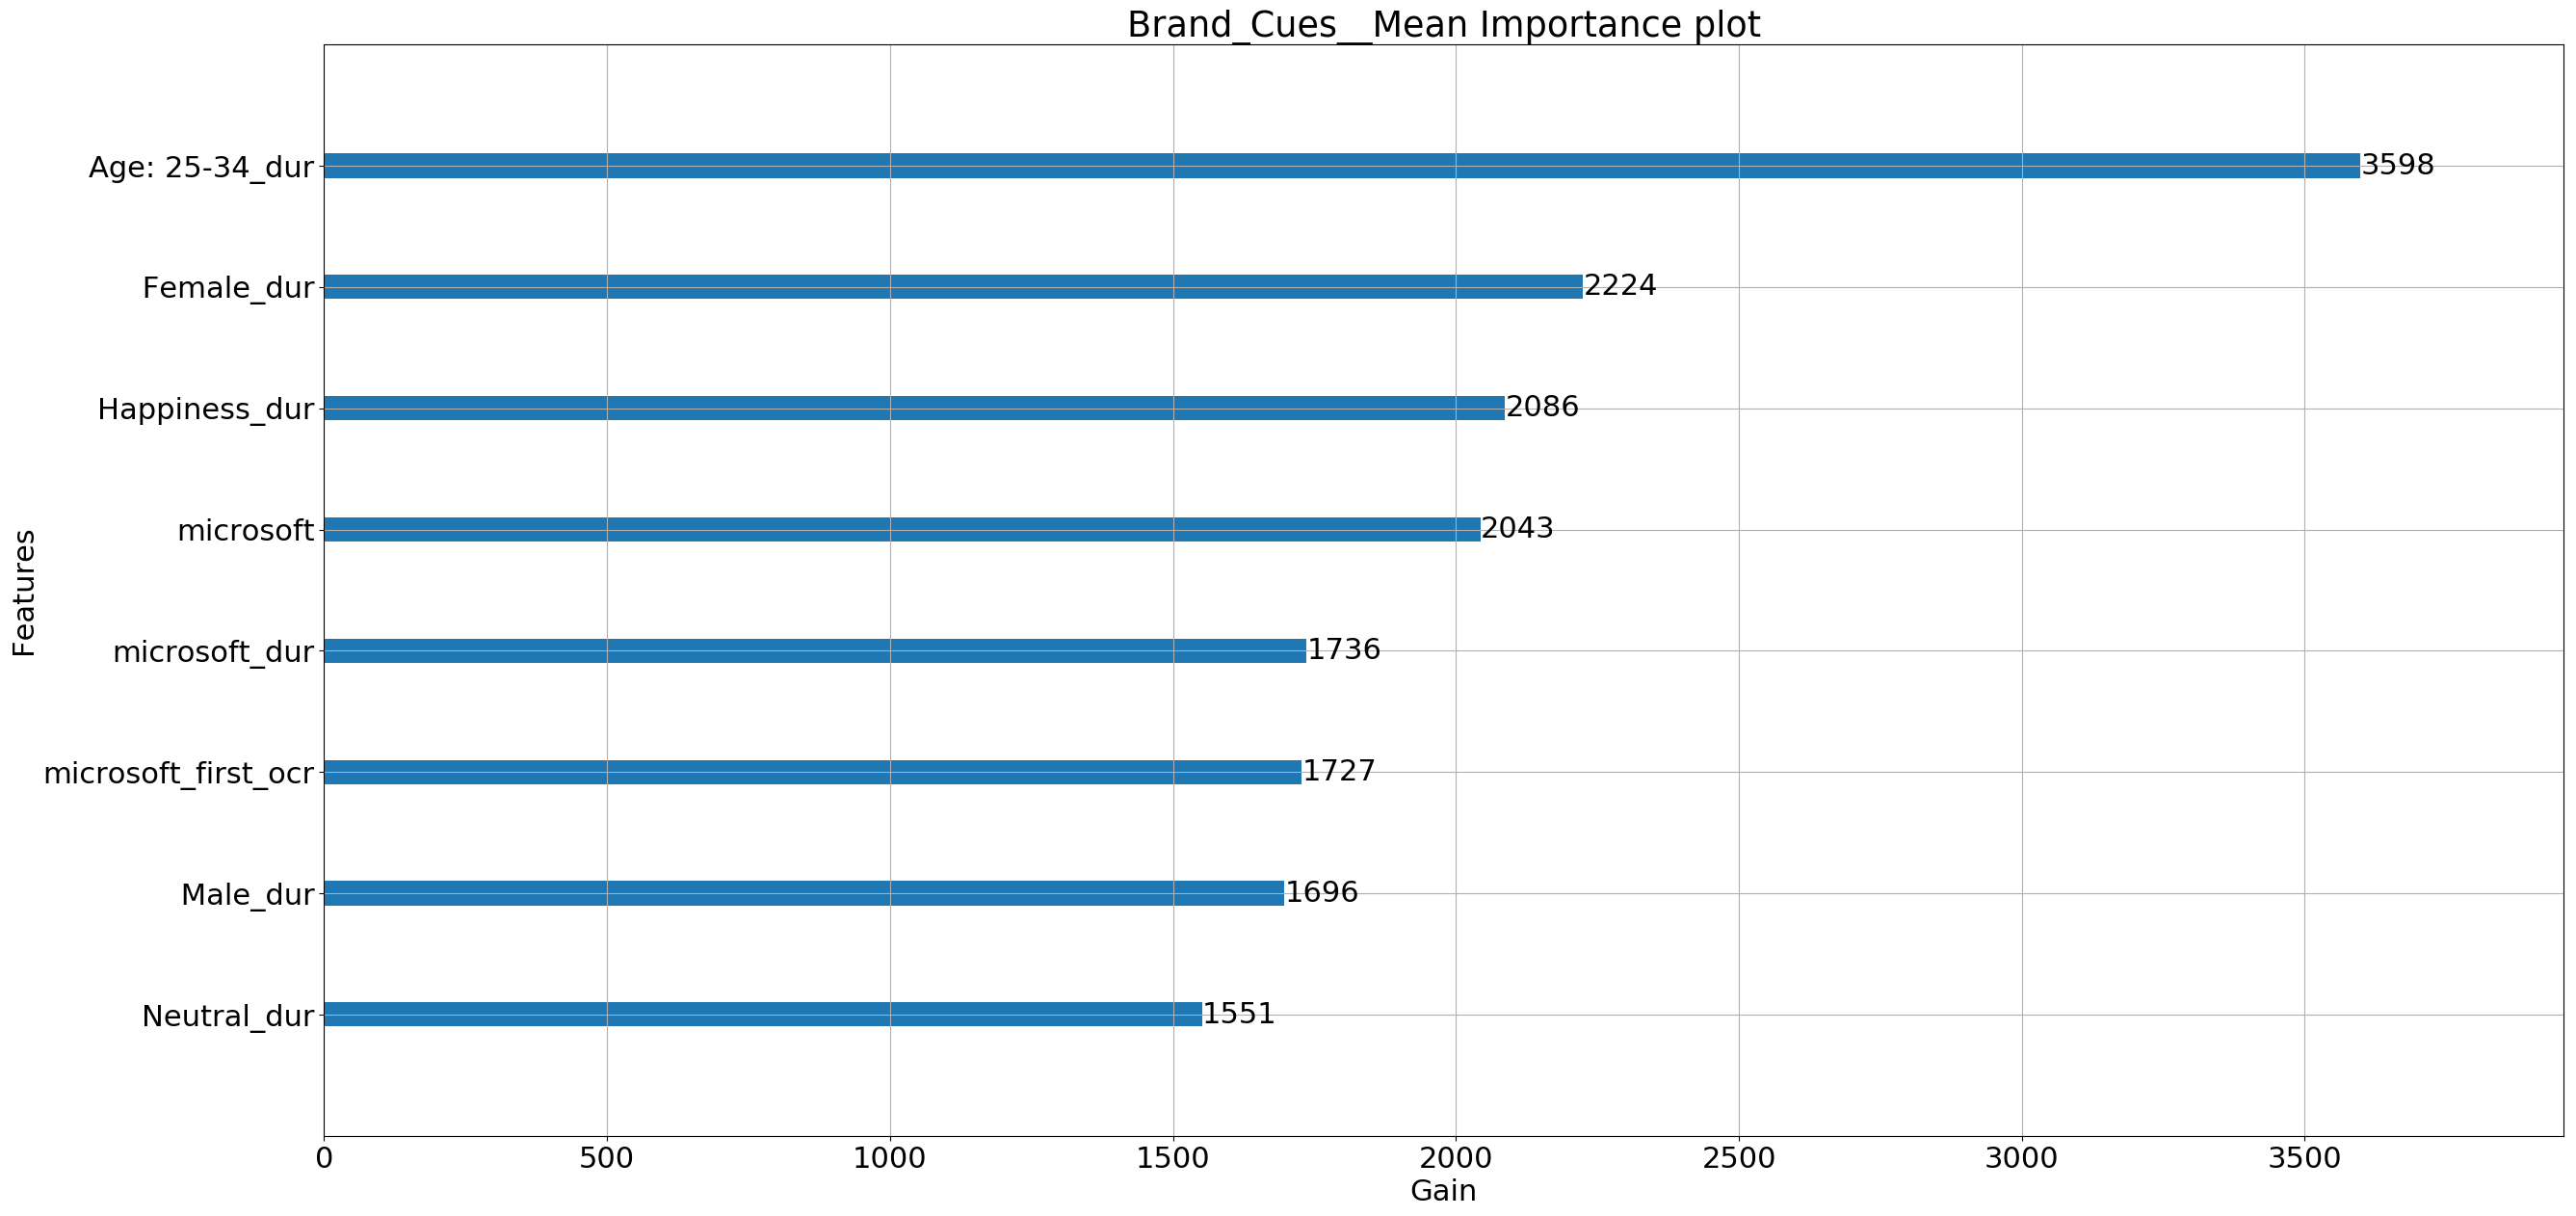

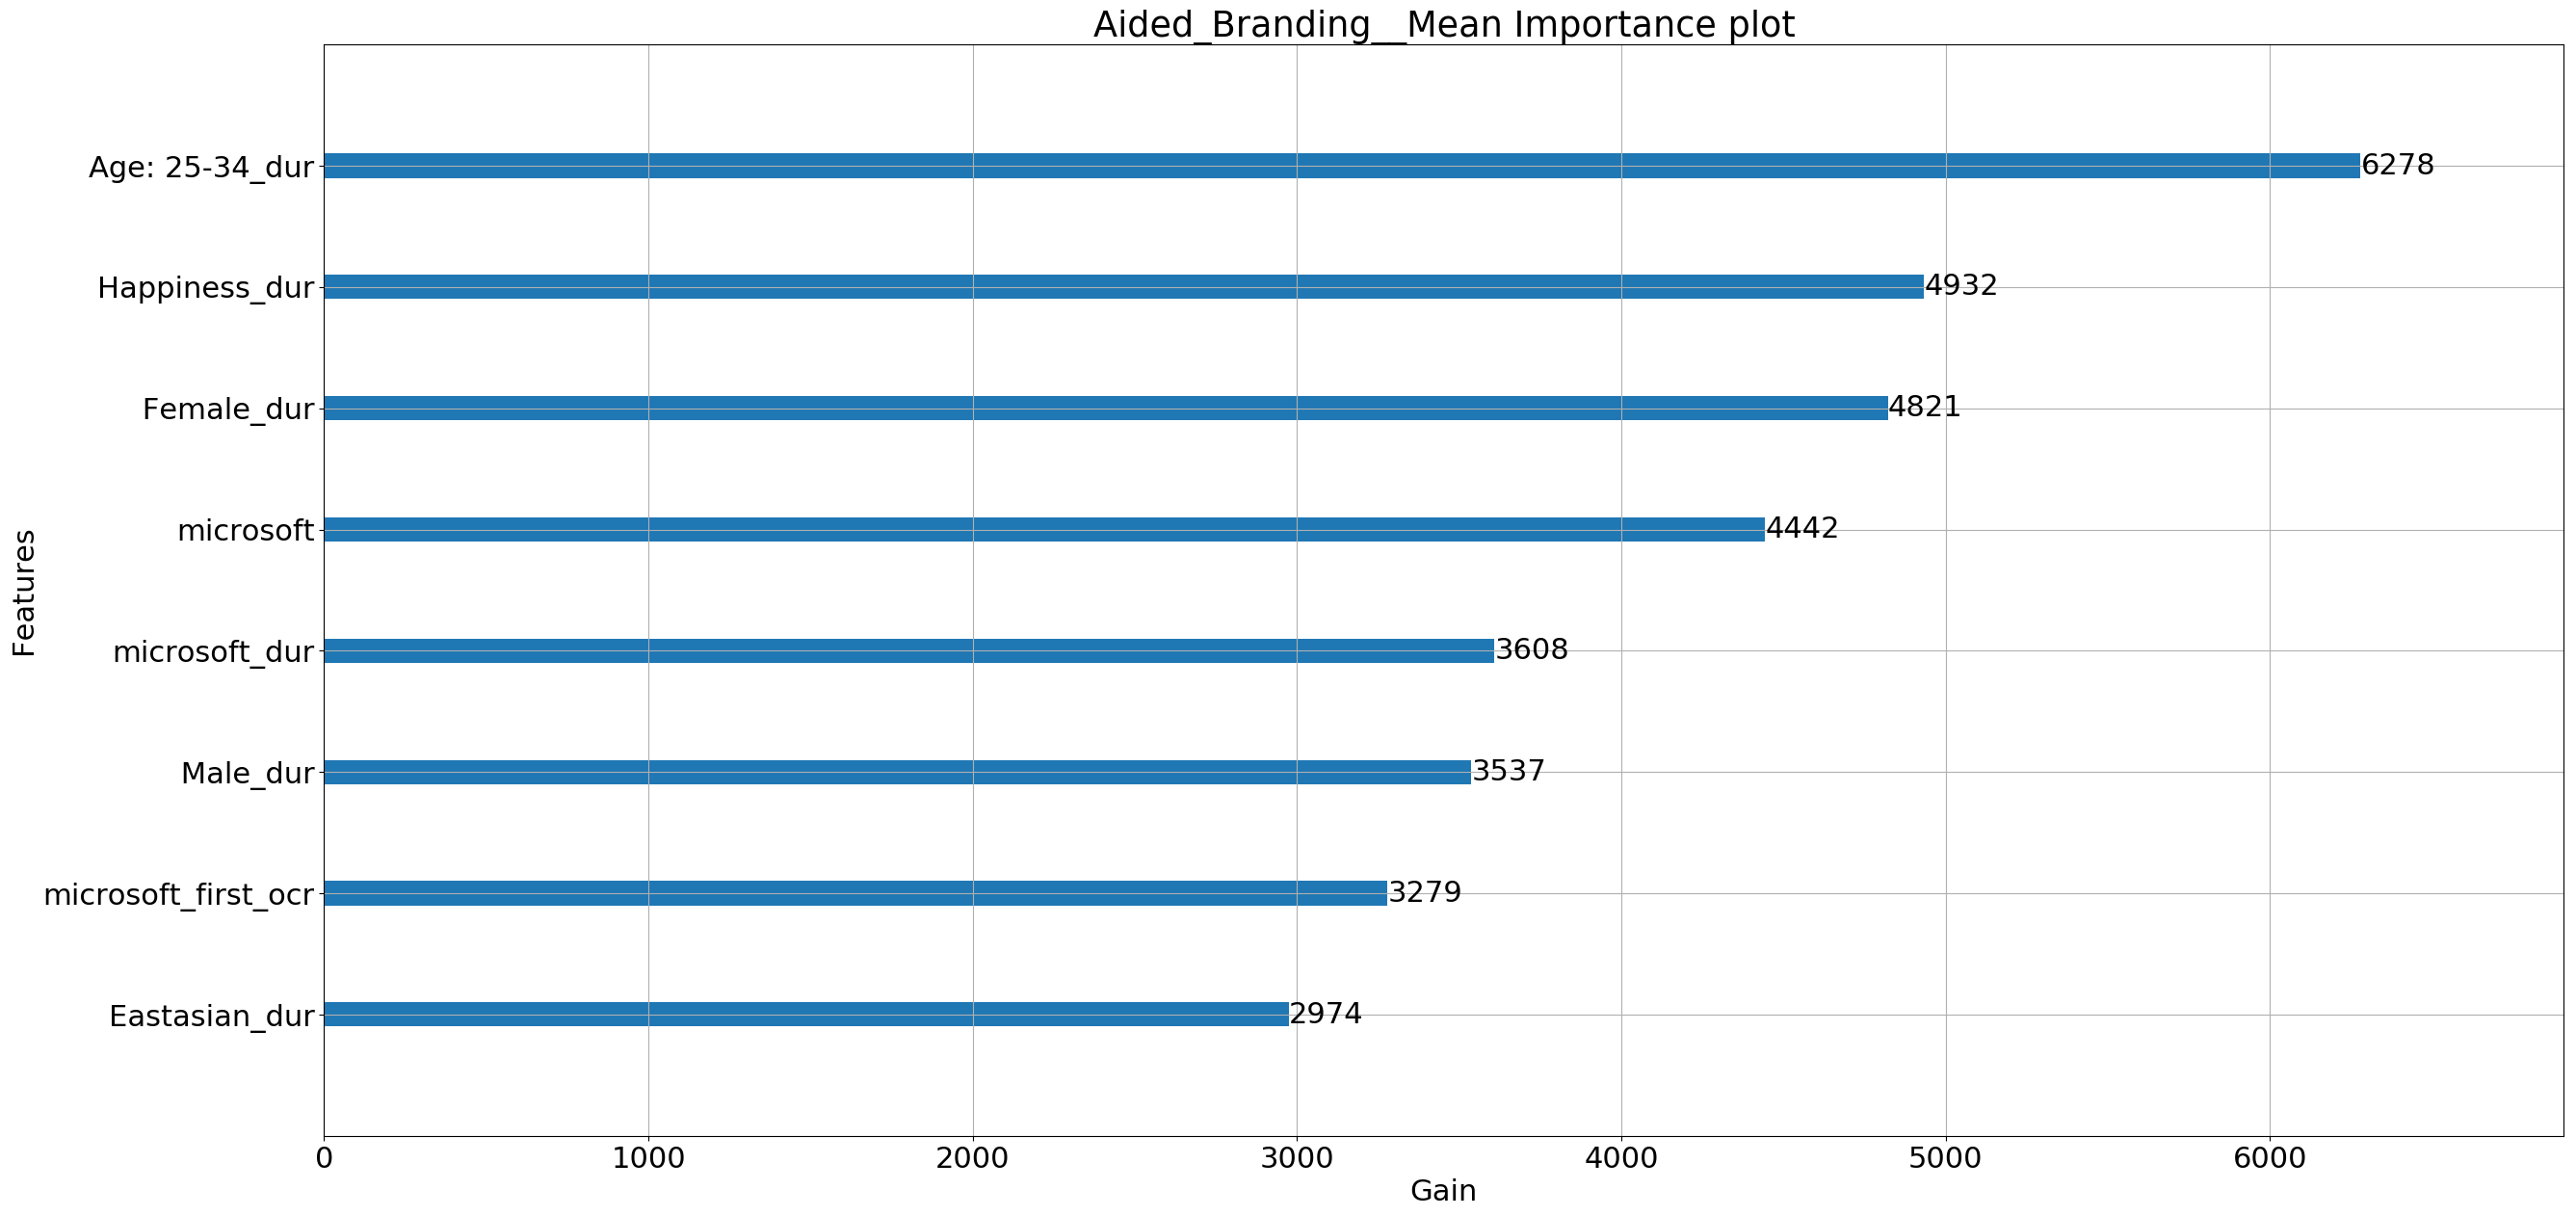

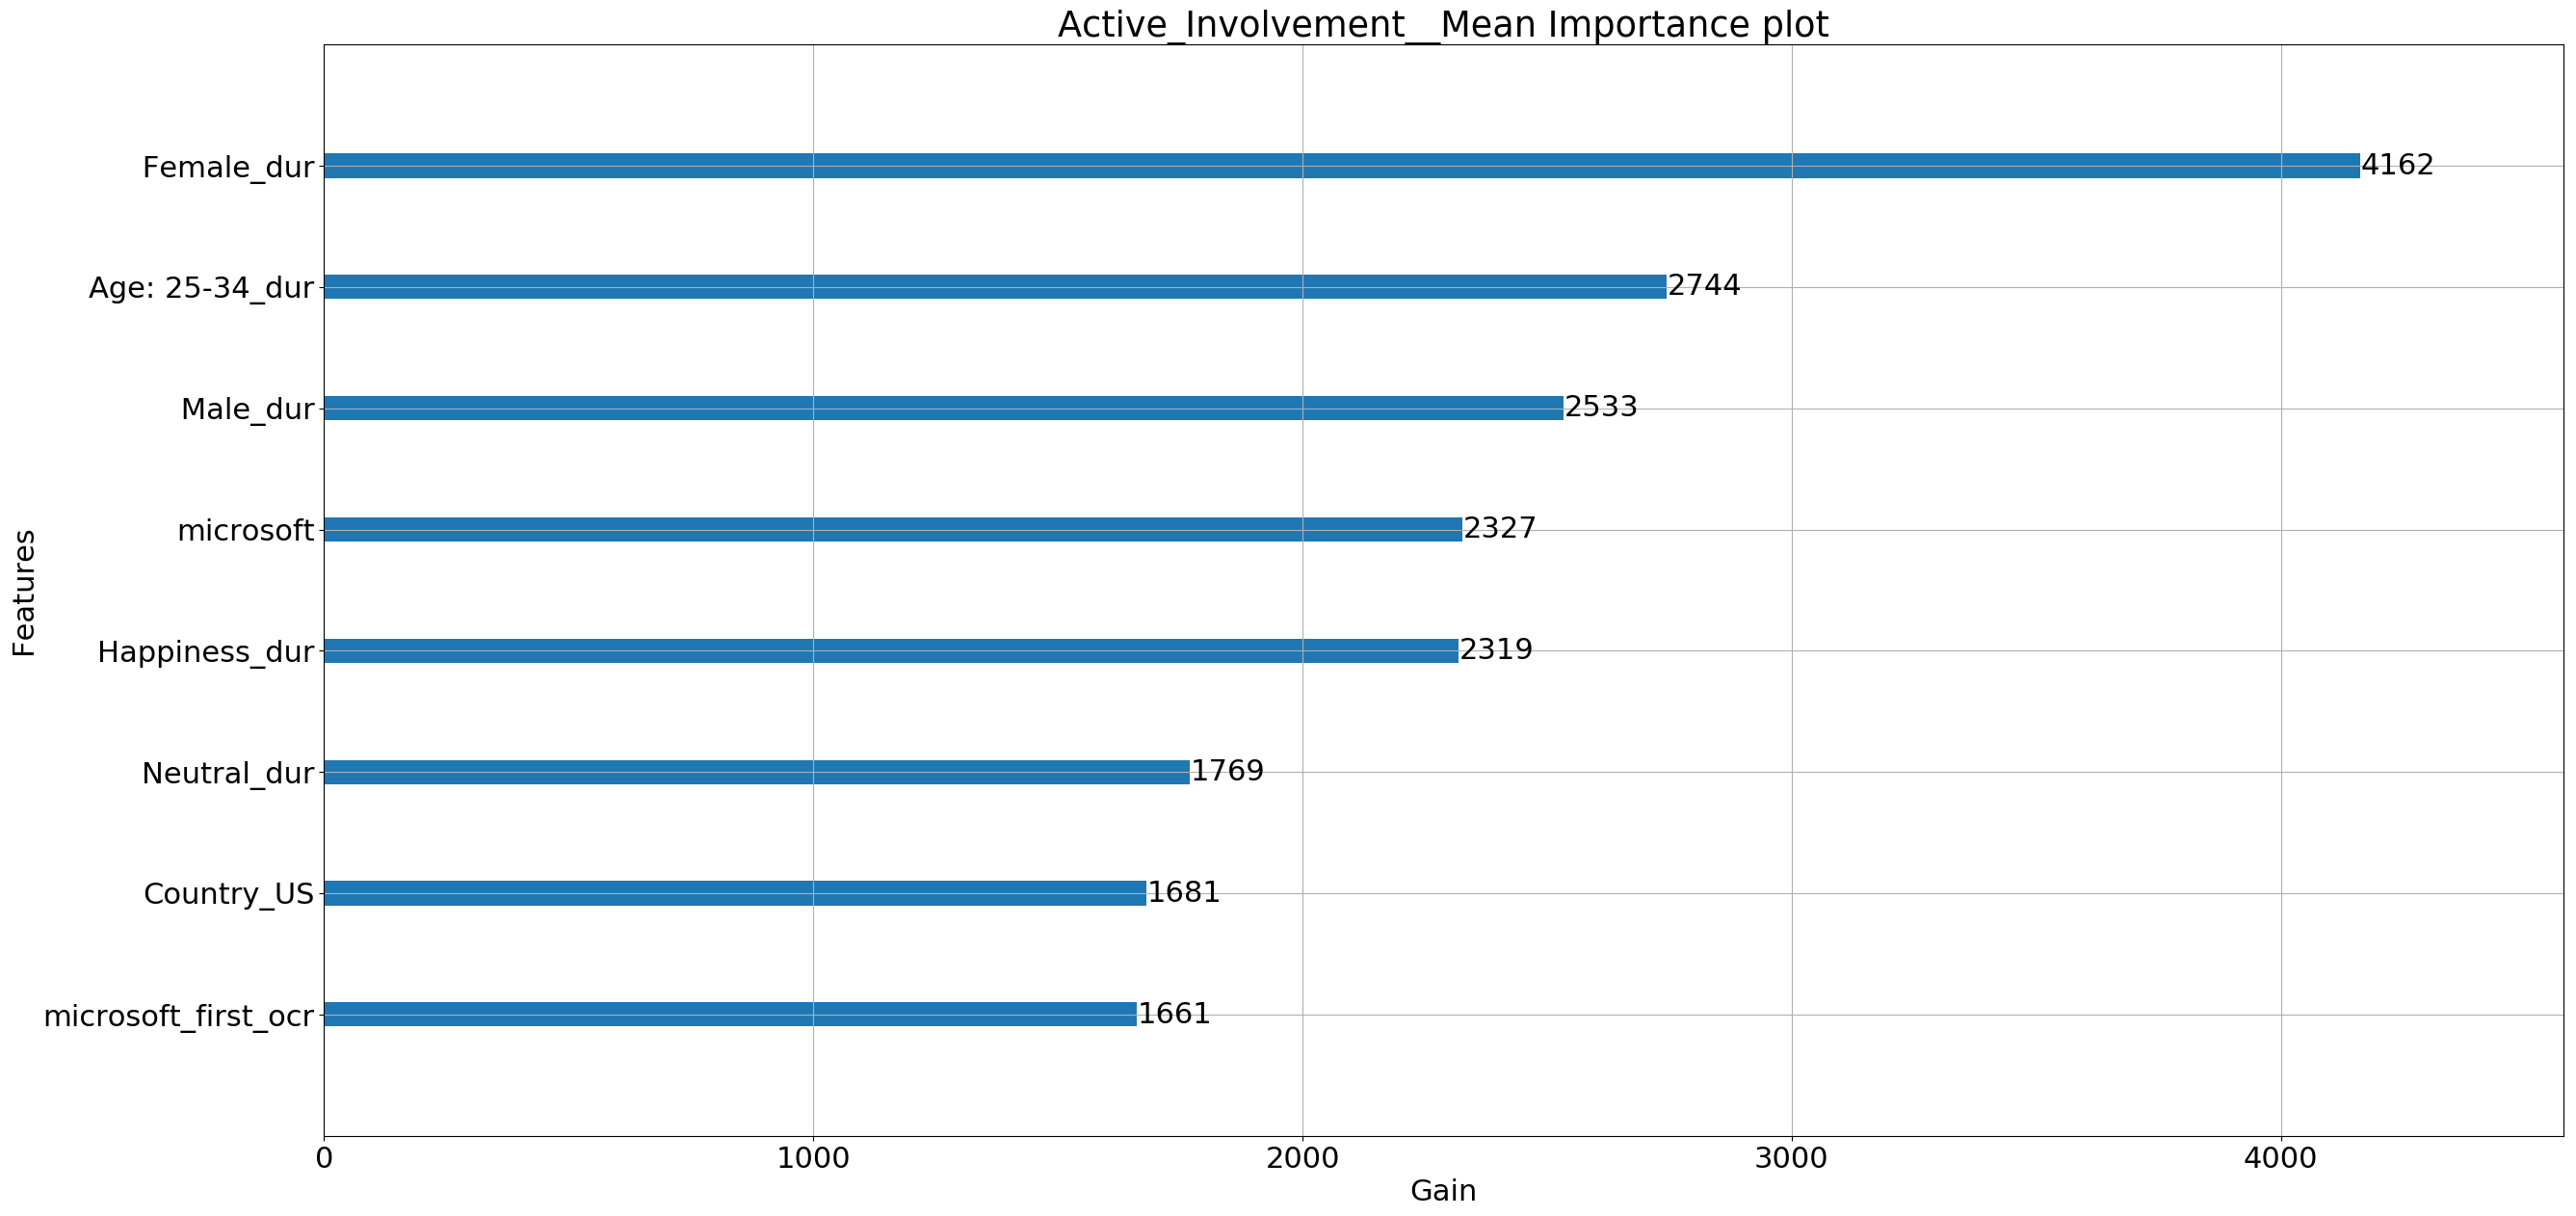

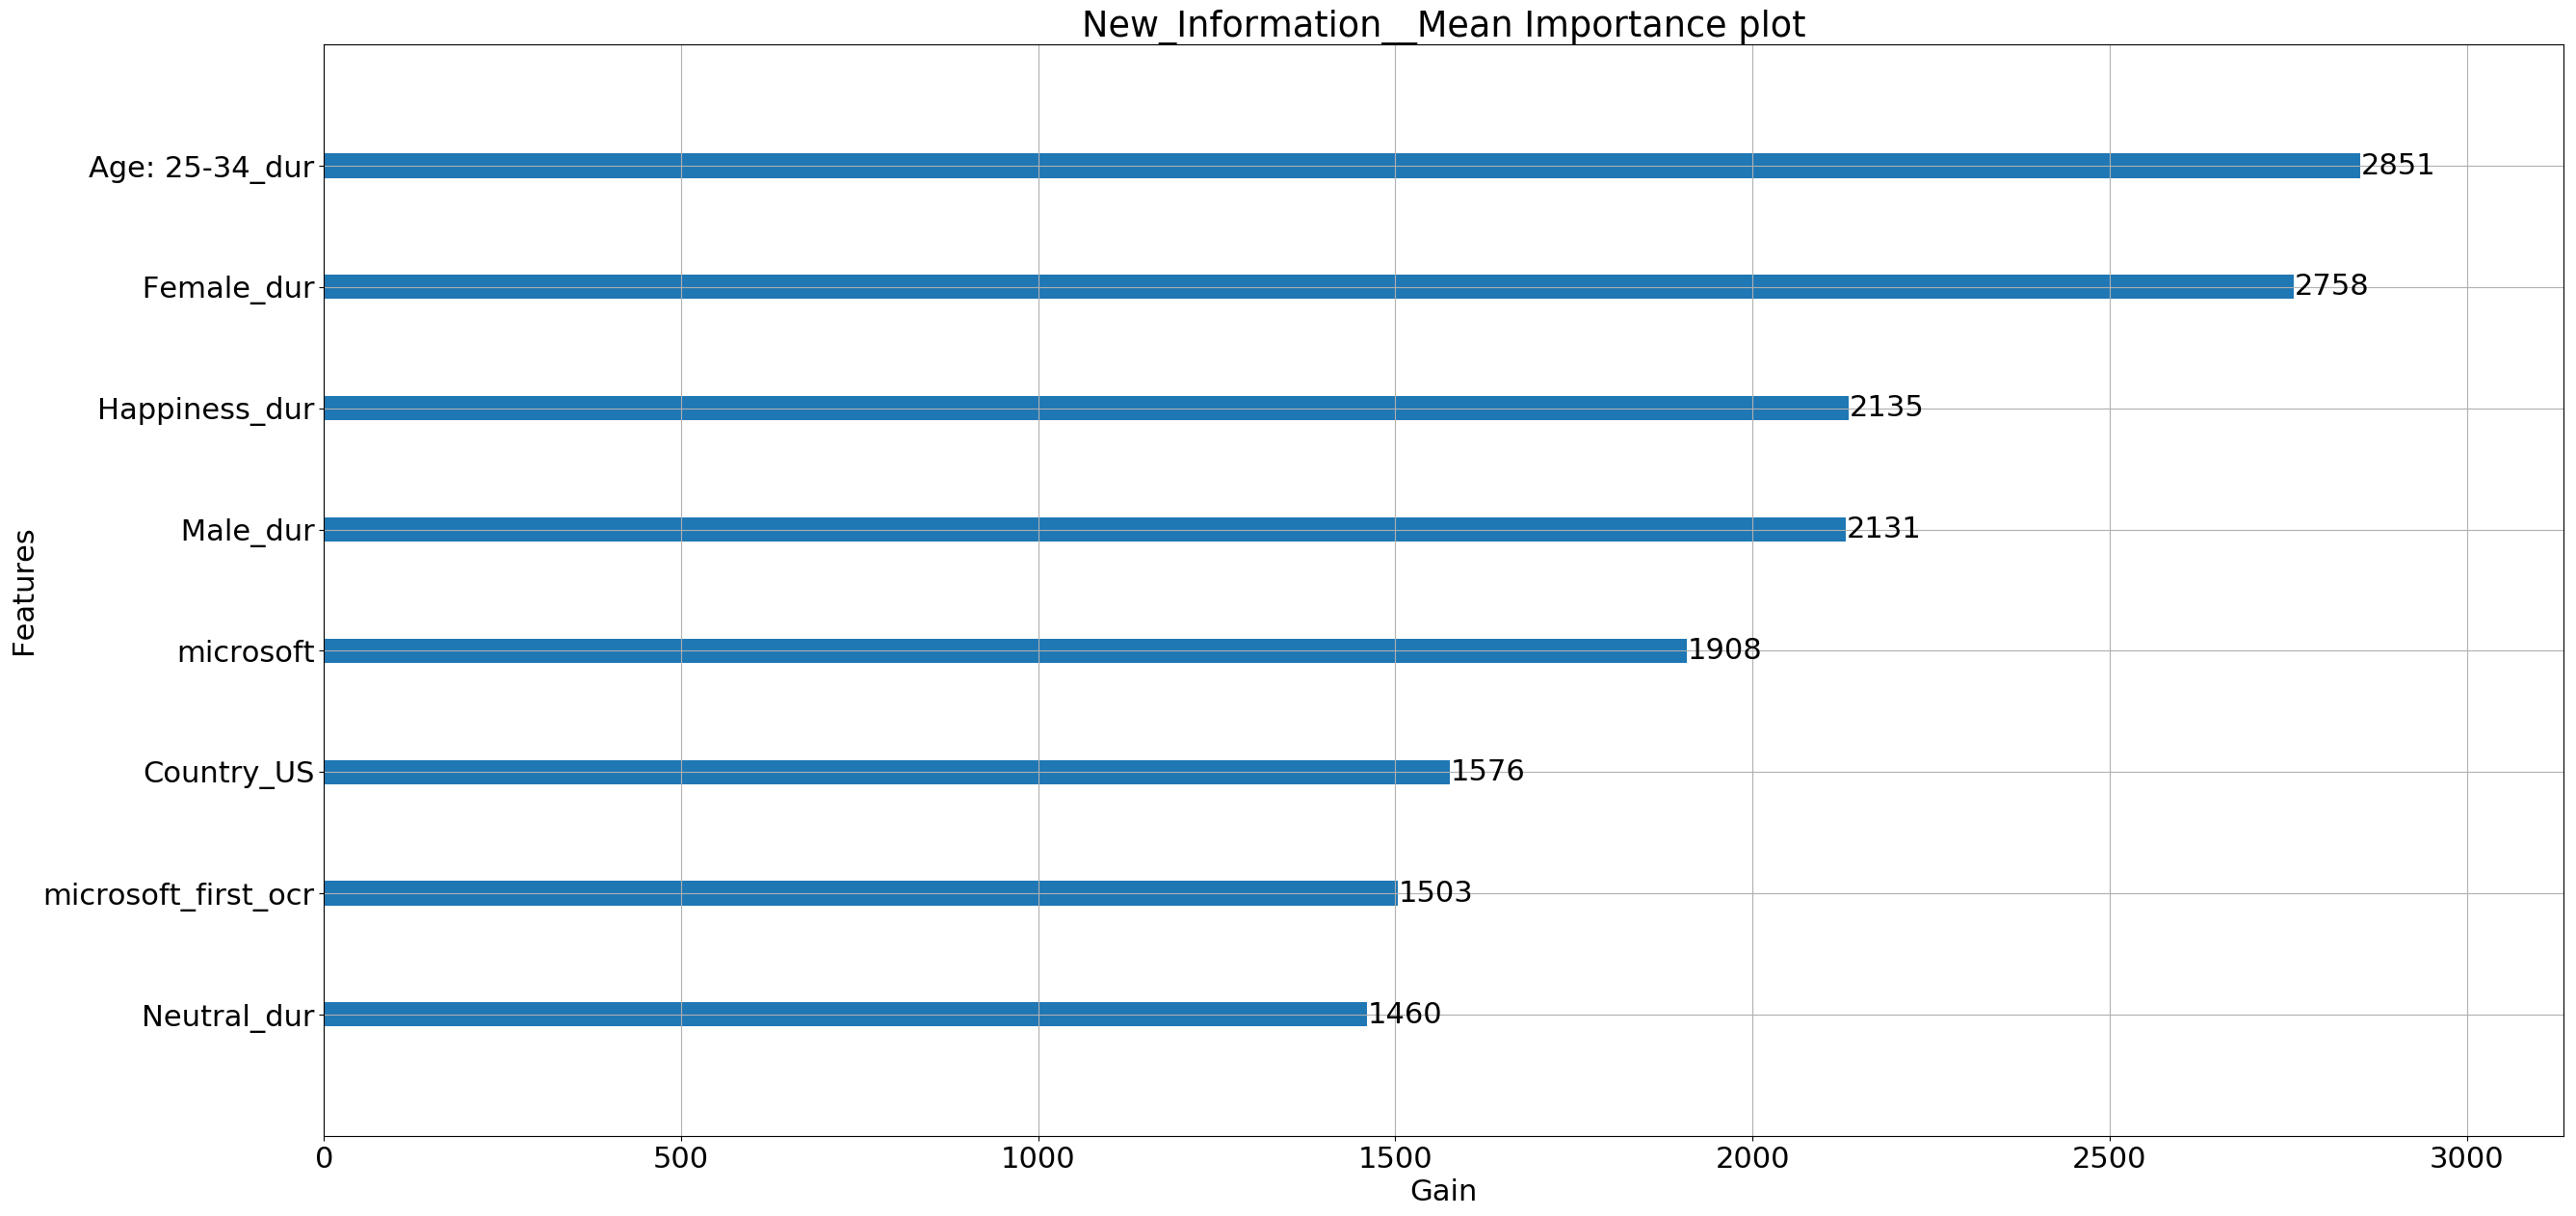

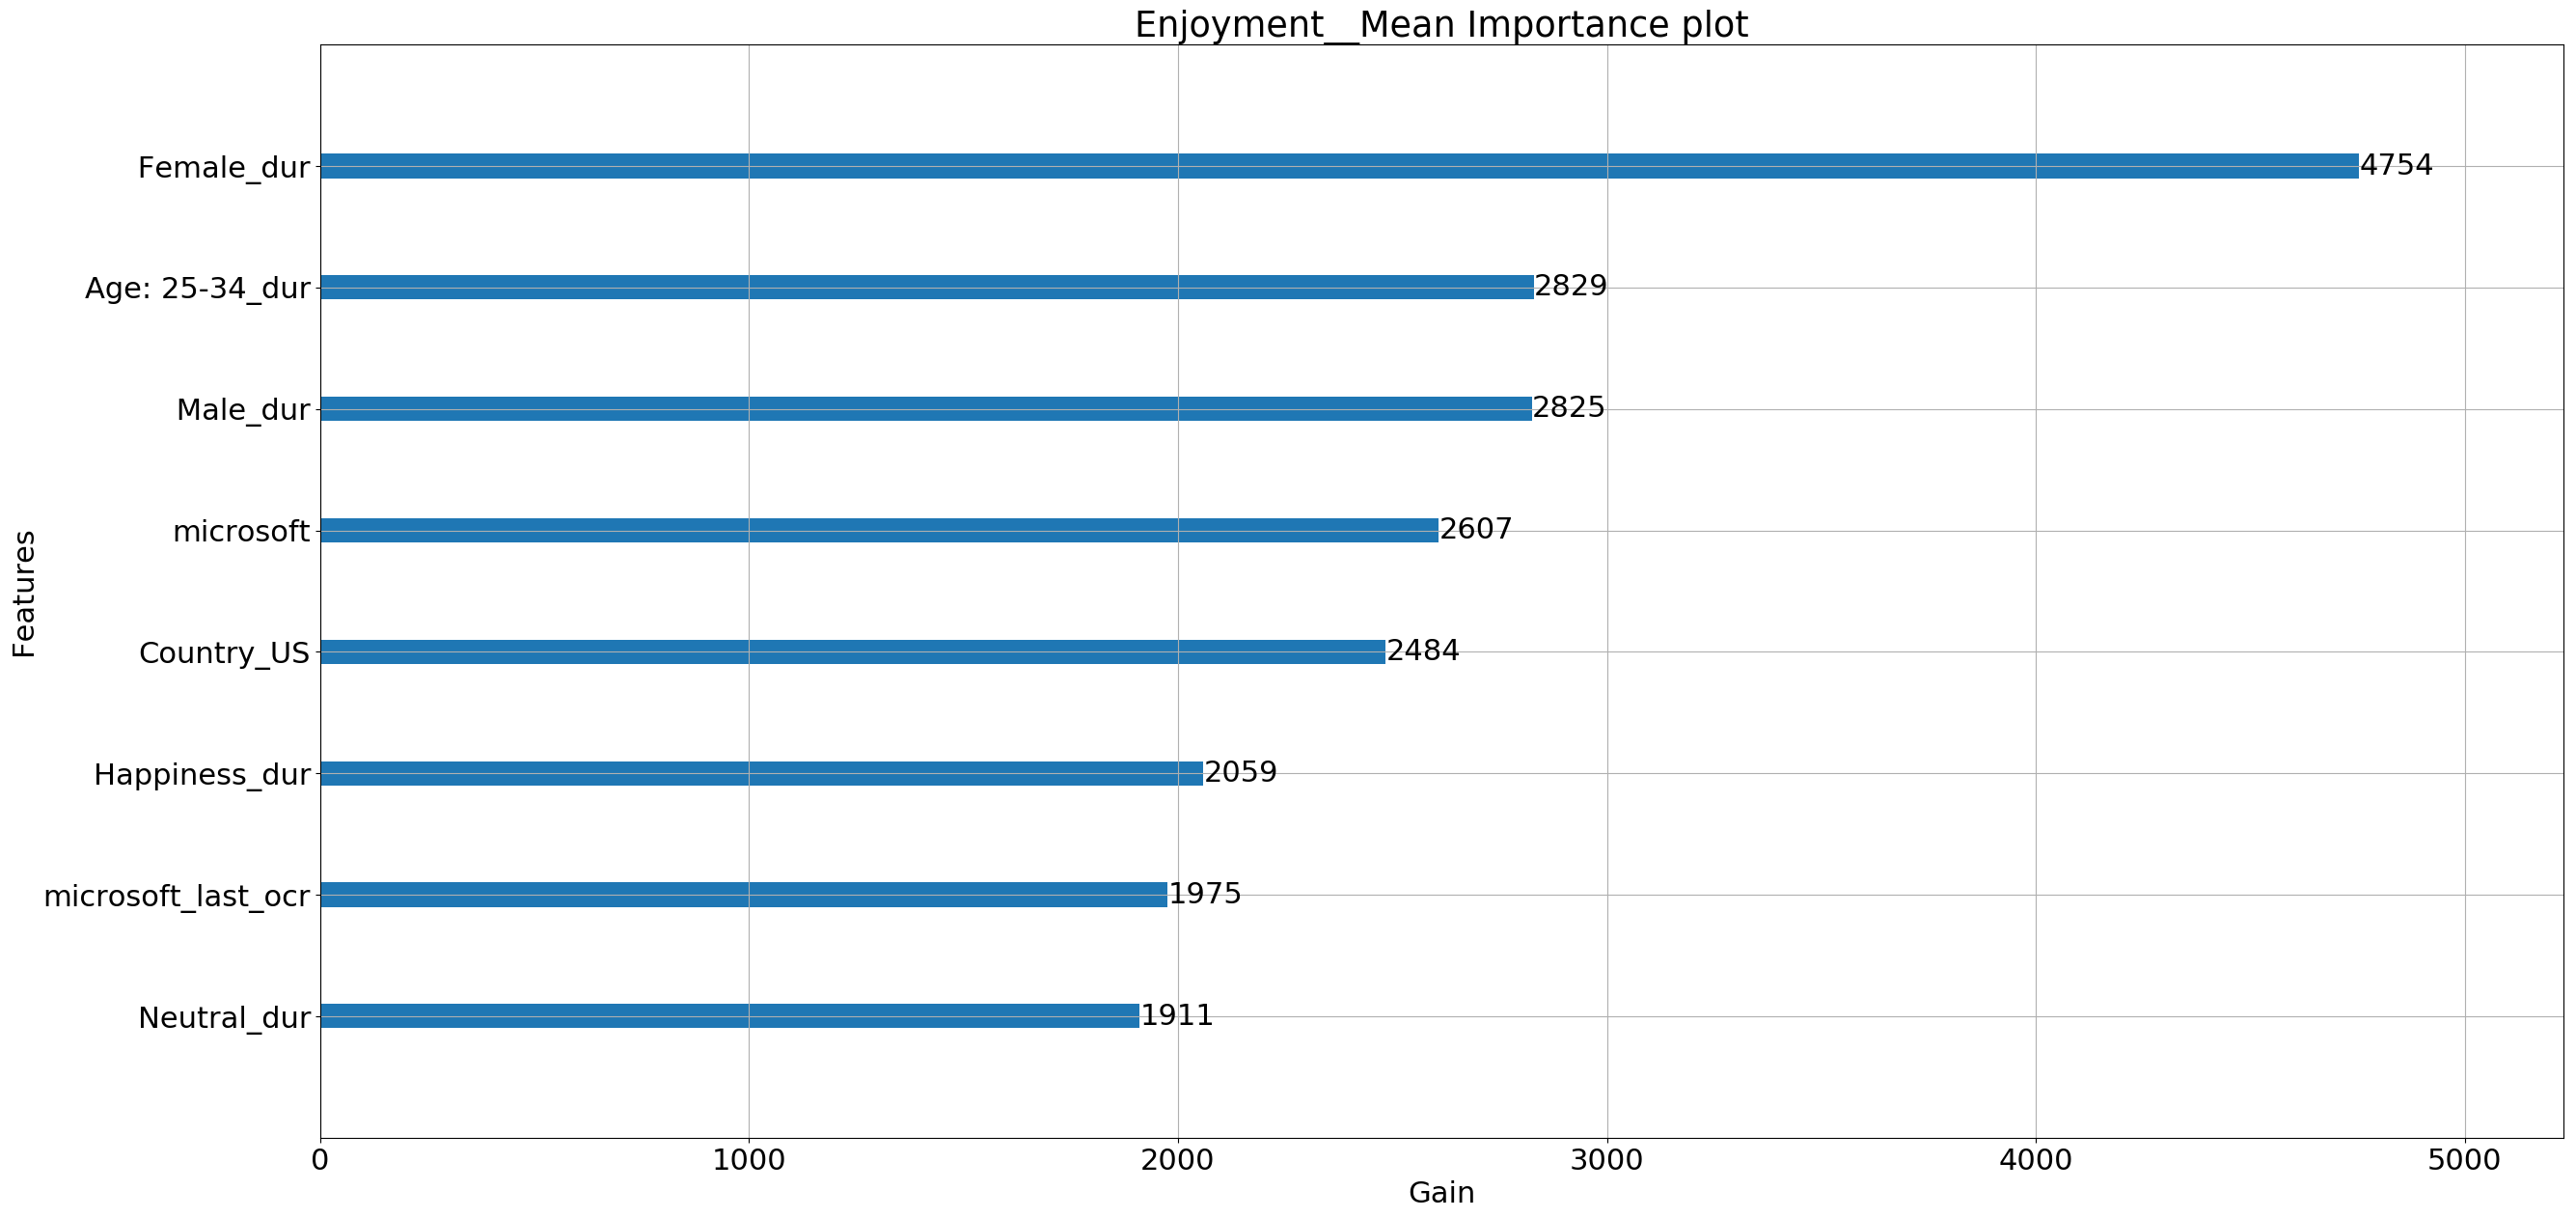

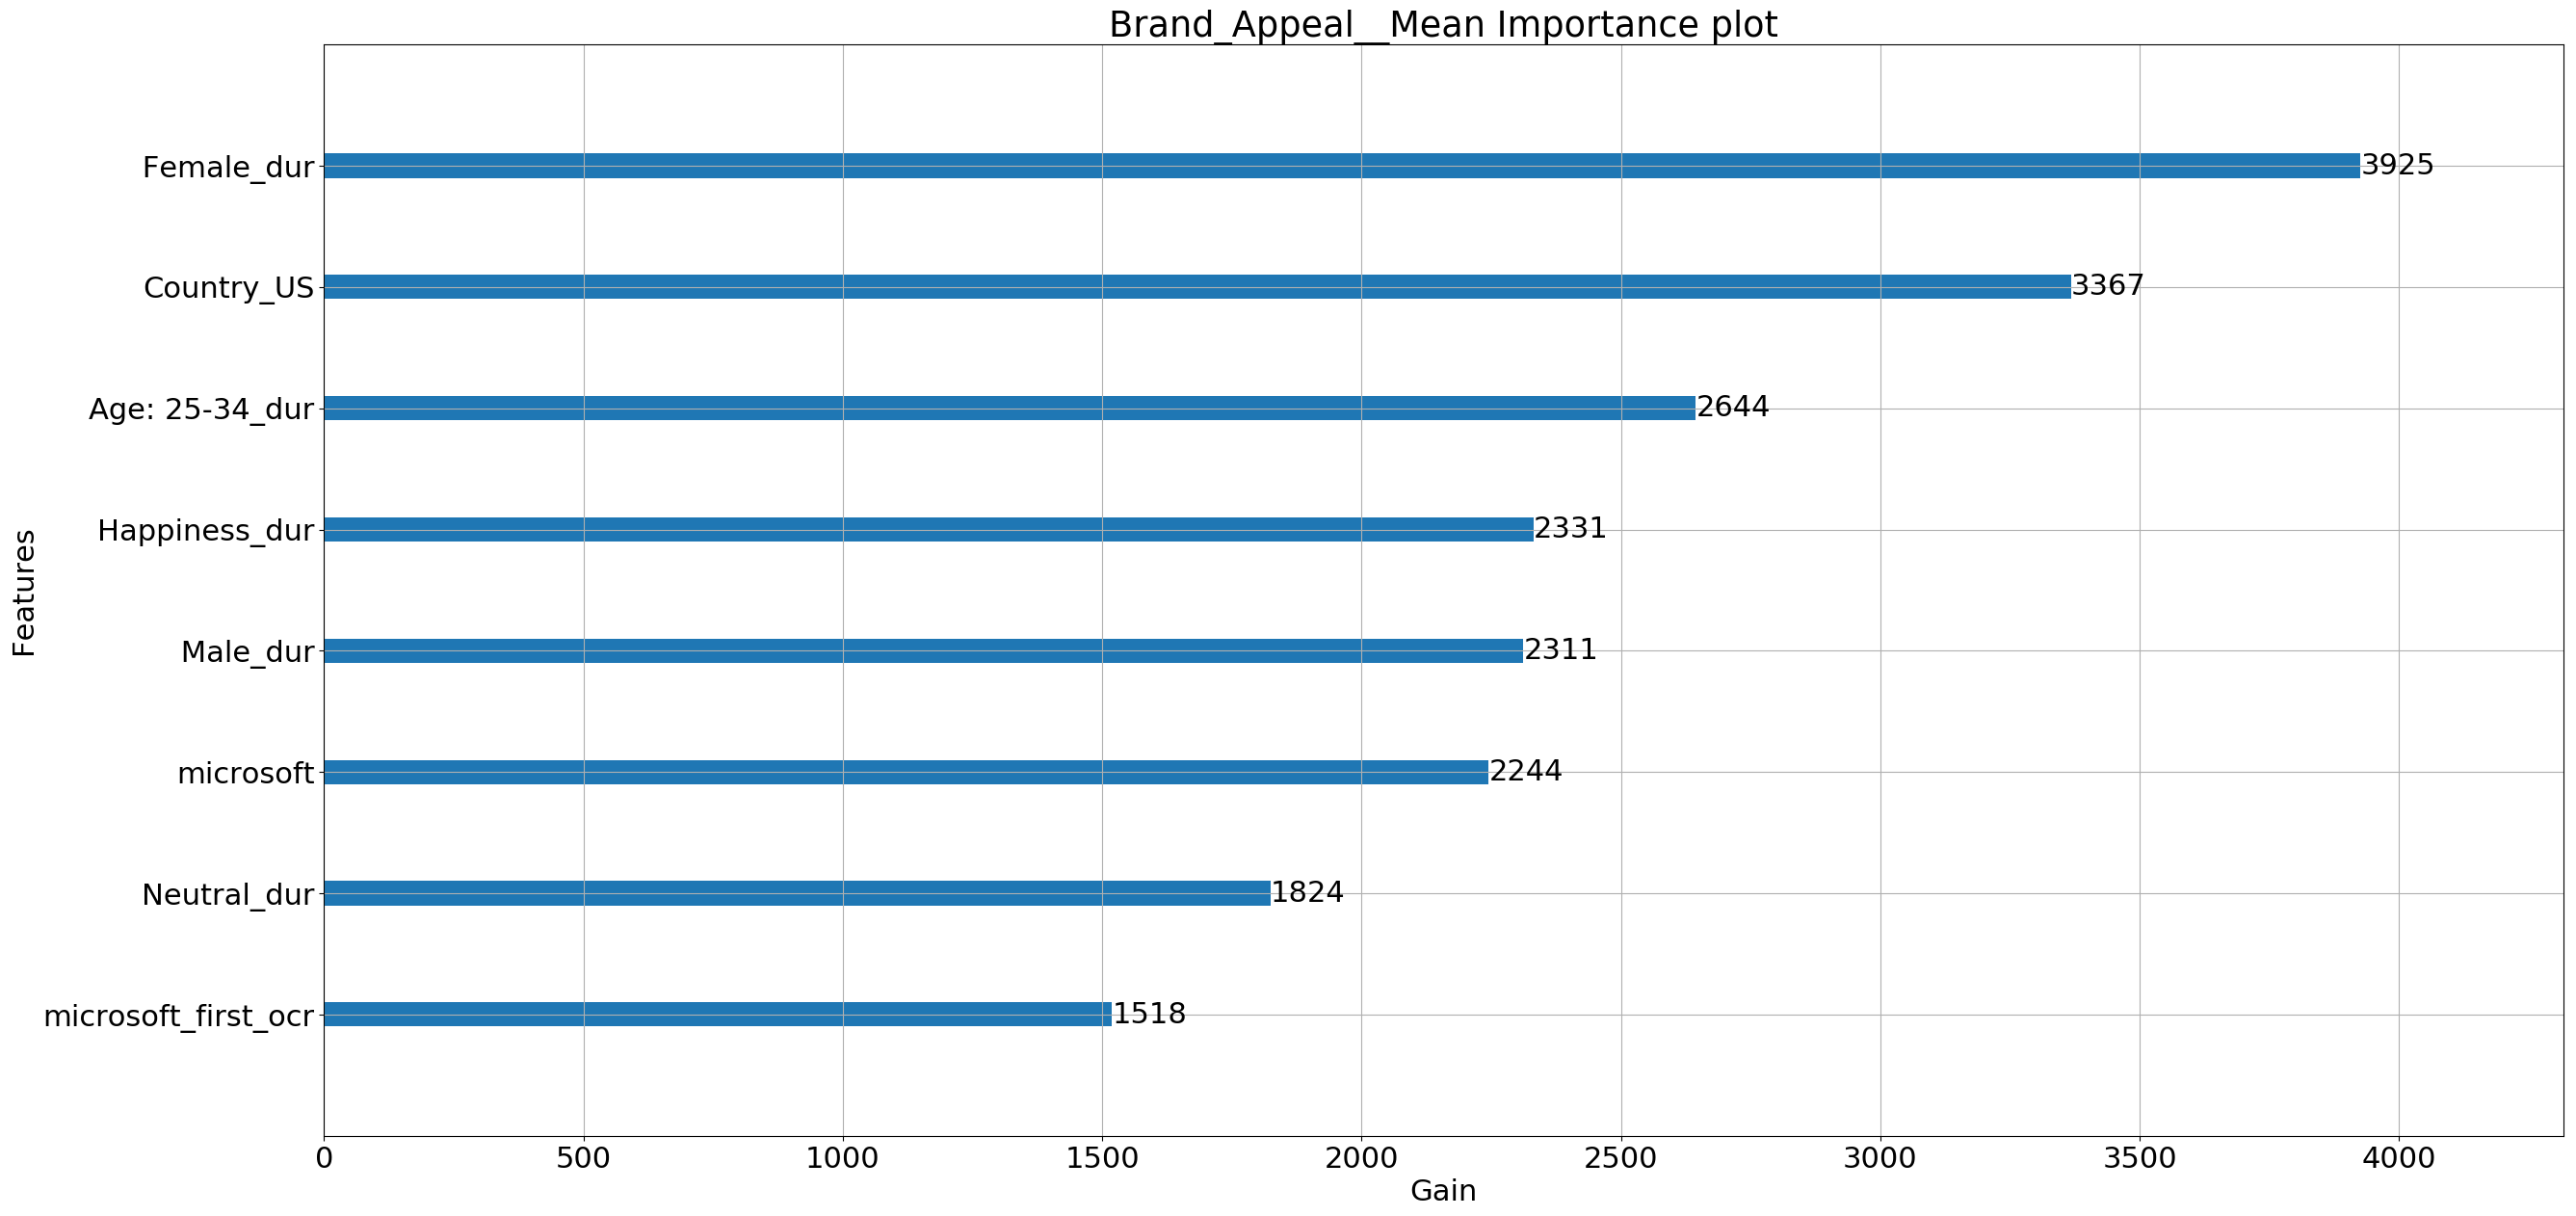

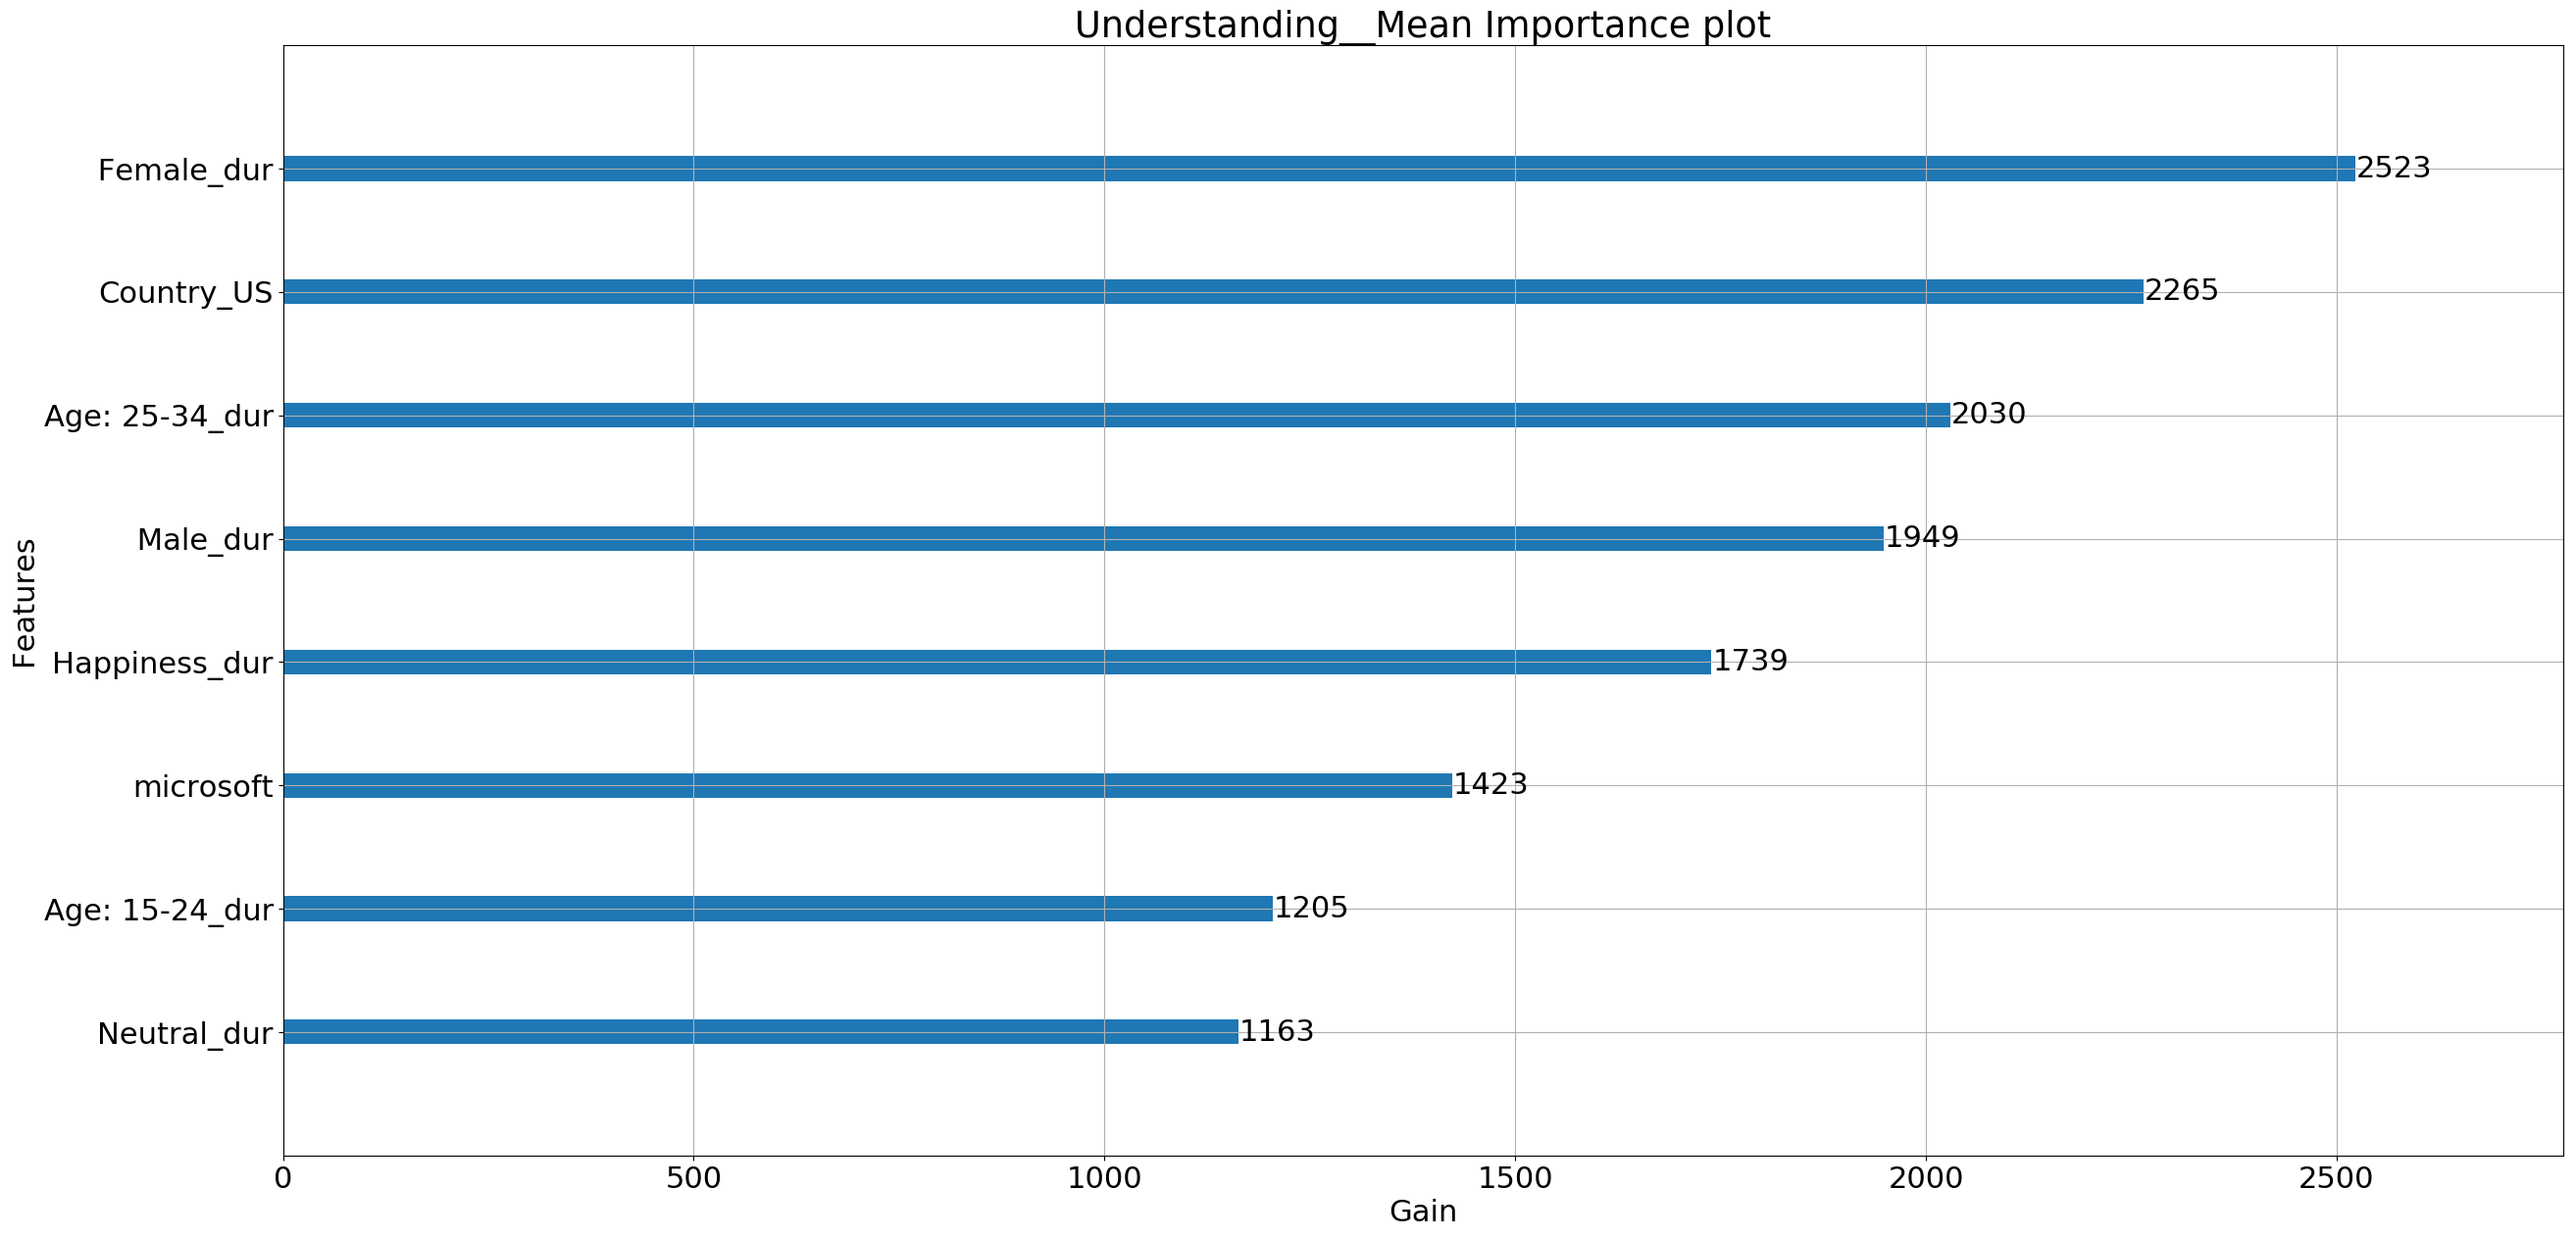

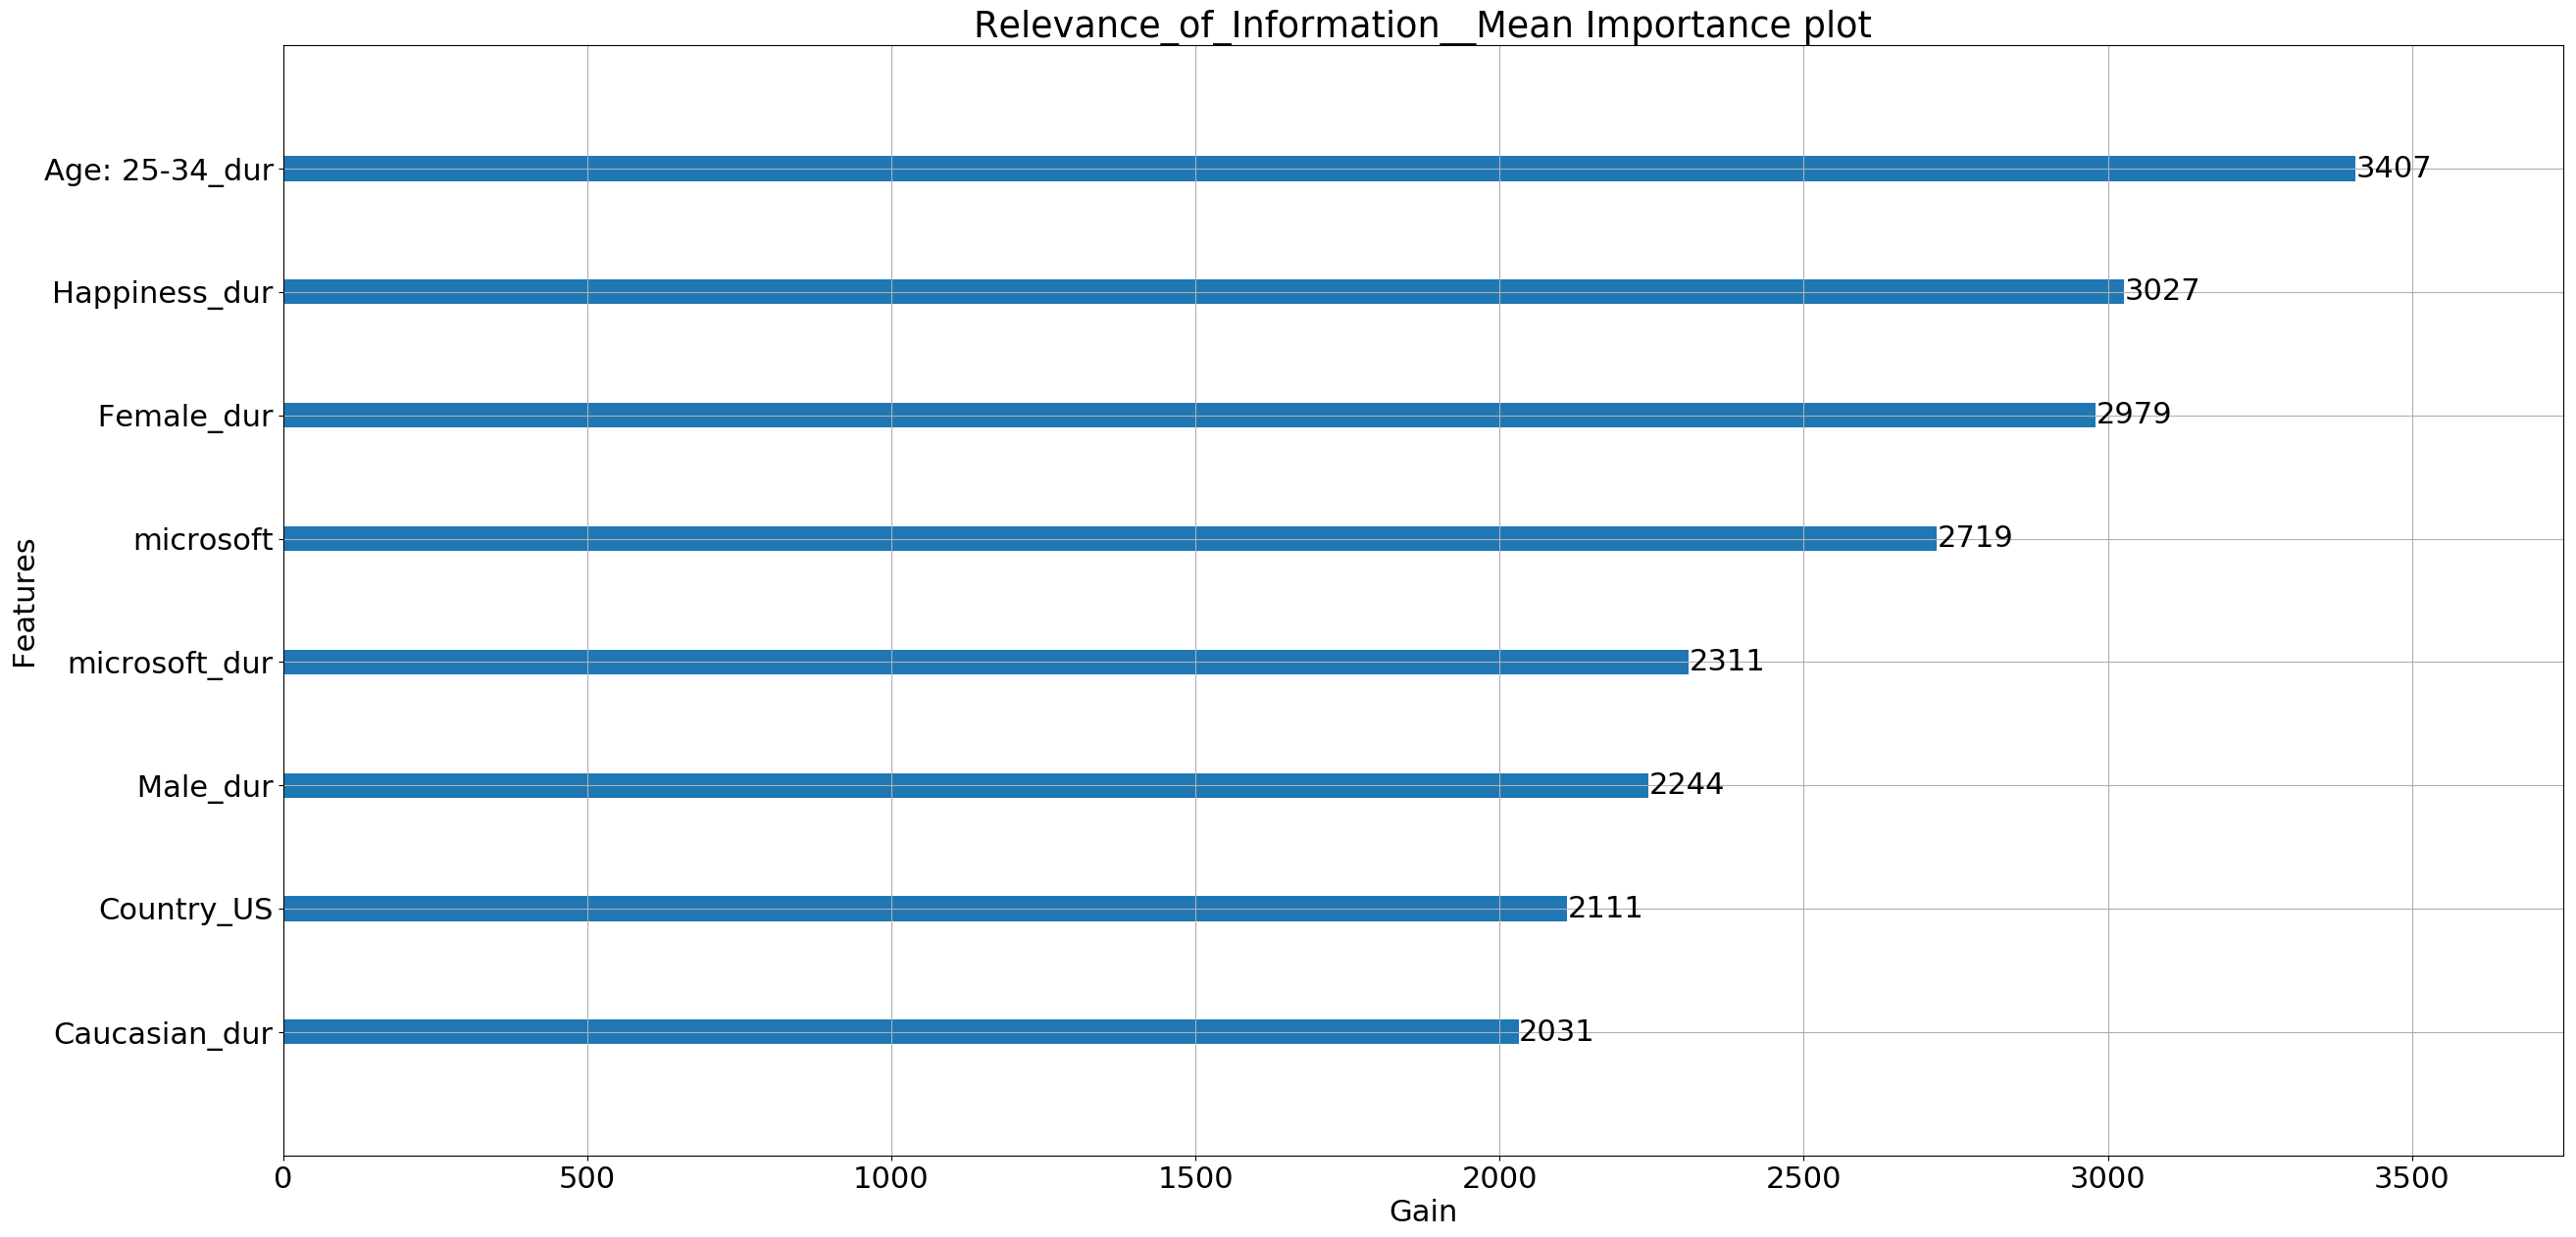

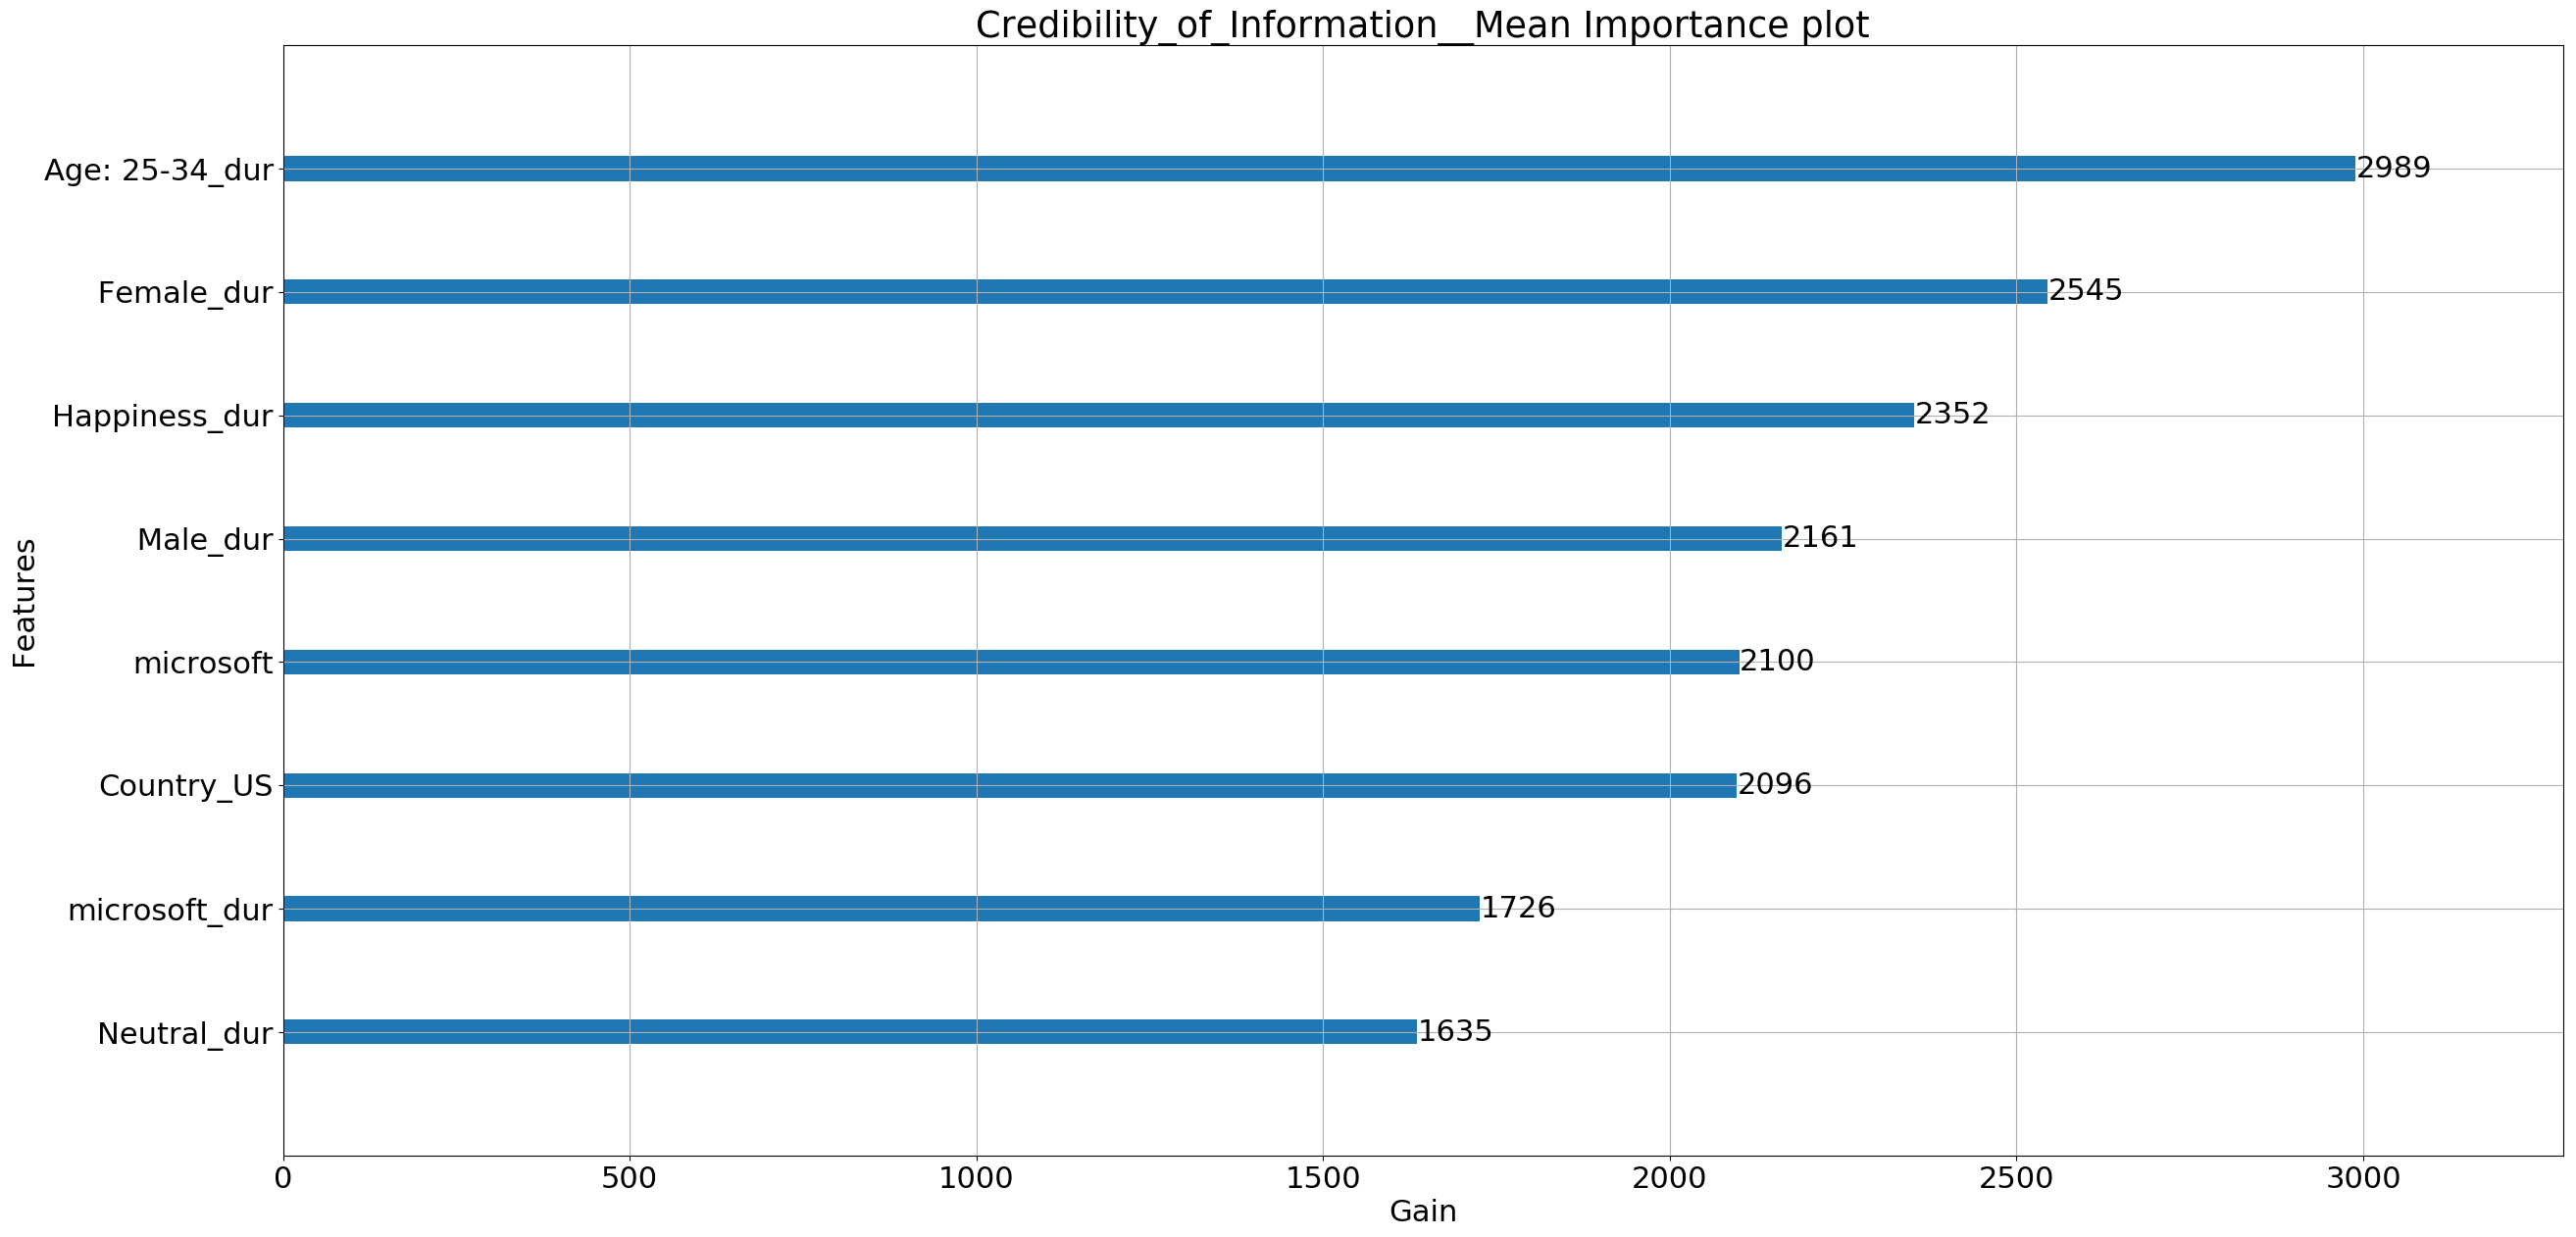

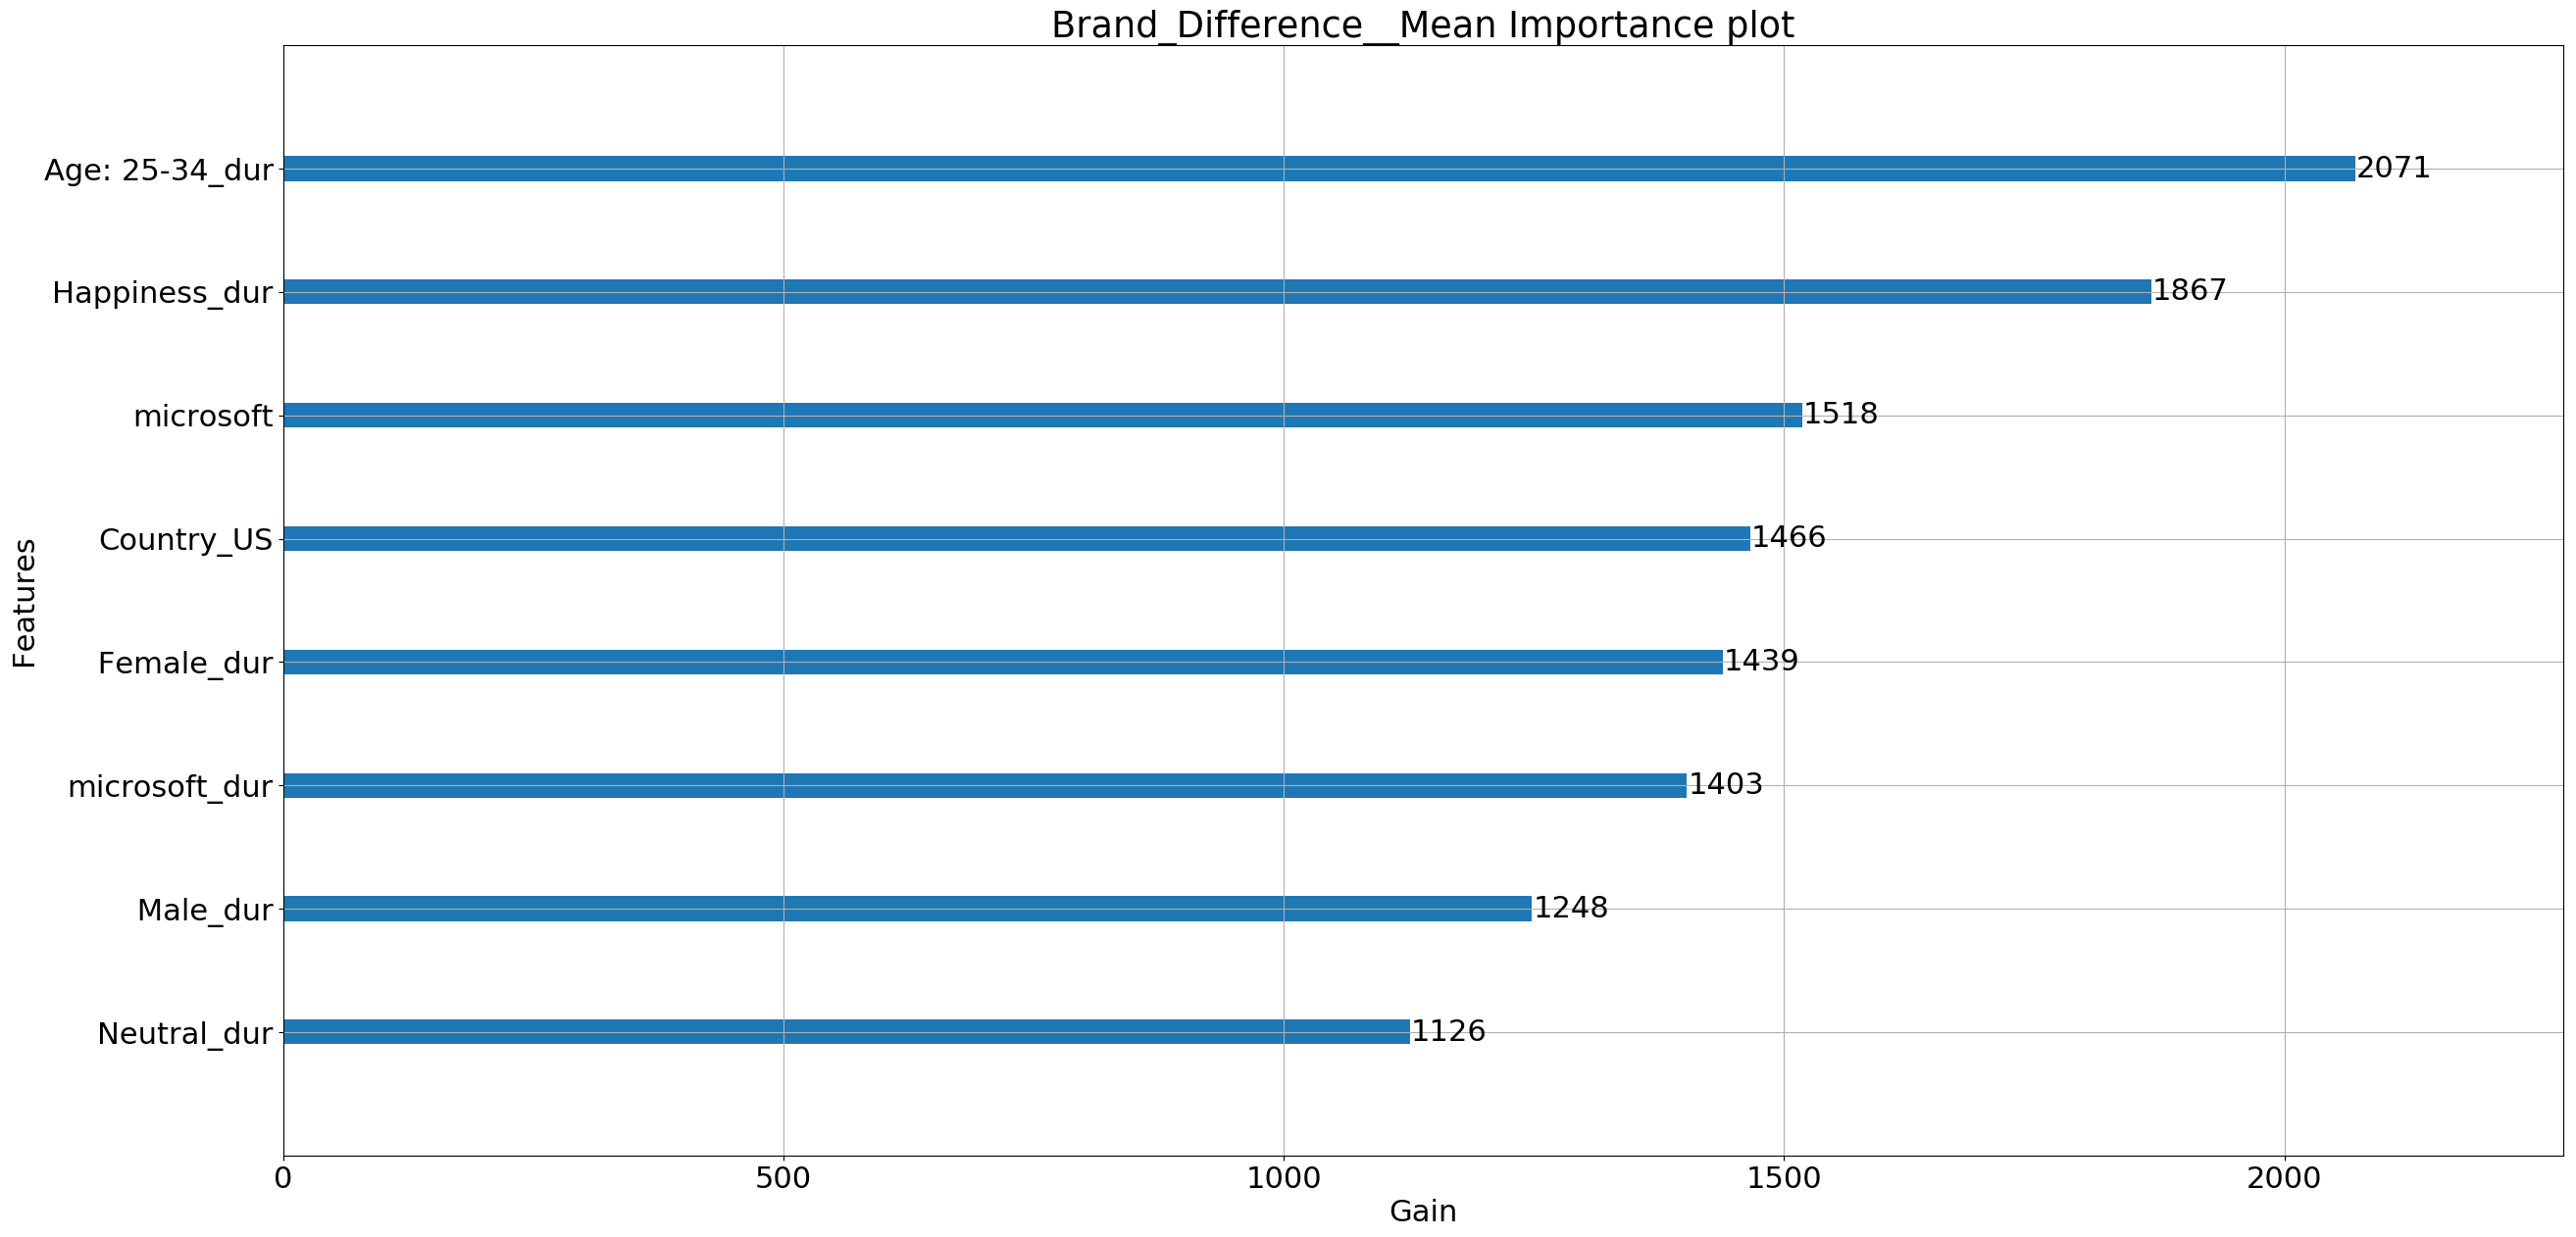

In [139]:
model.plot_feature_importance(models,10,y_test.columns,X_test.columns[1:],savefig=False)

In [117]:
shap.initjs()
explainer= shap.TreeExplainer(models[])
shap_values= explainer.shap_values(X_train.drop('Video Name',1))

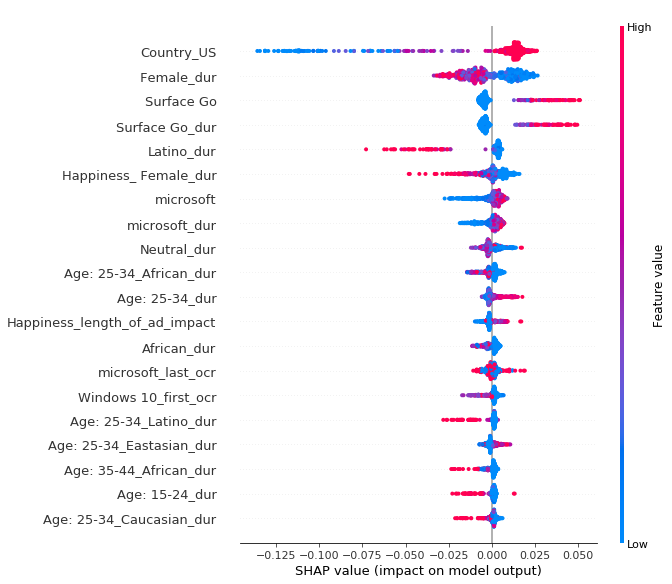

In [118]:
shap.summary_plot(shap_values,X_train.drop('Video Name',1))

In [119]:
model_xgb = Model('xgb')
models_xgb = model.train(X_train,y_train,X_test,y_test,metrics='r2',plot_error=False)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.933366
For test set
r2_score: 0.964200


Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.886564
For test set
r2_score: 0.885456


Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.903549
For test set
r2_score: 0.858784


Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.878818
For test set
r2_score: 0.889740


New_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.897238
For test set
r2_score: 0.901507


Enjoyment__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.870596
For test set
r2_score: 0.905245


Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.905725
For test set
r2_score: 0.918219


Understanding__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.881156
For test set
r2_score: 0.896129


Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.858043
For test set
r2_score: 0.869691


Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


For training set
r2_score: 0.849852
For test set
r2_score: 0.865255


Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


For training set
r2_score: 0.895193
For test set
r2_score: 0.902795




[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [44]:
from sklearn.model_selection import cross_val_predict
predictions = cross_validate(model.model.set_params(**model.training_params[0]),X_train.drop('Video Name',1),y_train['Unaided_Branding'],cv=5,n_jobs=-1,scoring='r2')

In [43]:
r2_score(y_train['Unaided_Branding'],predictions)

0.9356943516829603

In [47]:
predictions['test_score']

array([0.91917237, 0.93098589, 0.93868861, 0.96316628, 0.92124501])